# **Trabalho 1: Regressão Linear Aplicada à Qualidade de Vinhos**

**Disciplina:** ENE0082 - **NOÇÕES DE INTELIGÊNCIA ARTIFICIA**  
**Autor:** Gabriel M. S. O.  
**Matrícula:** 190042656


## Índice:

[**Trabalho 1**: Regressão Linear na Qualidade de Vinho.](#trabalho-1-regressão-linear-na-qualidade-de-vinho)

1.  [Sumário](#sumário)
2.  [Executando o Projeto](#executando-o-projeto)
    *   [Estrutura do Projeto](#estrutura-do-projeto)
    *   [Python](#python)
    *   [Poetry (versão 2.1.1)](#poetry-versão-211)
        *   [Instalação do Poetry](#instalação) <!-- Nomeado como "Instalação do Poetry" ou apenas "Instalação" -->
        *   [Configurando o Ambiente e Instalando Dependências](#configurando-o-ambiente-e-instalando-dependências)
3.  [Pré-processamento e Análise Exploratória dos Dados](#pré-processamento-e-análise-exploratória-dos-dados)
    *   [Tratamento da Coluna Categórica `type`](#tratamento-da-coluna-categórica-type)
    *   [Tratamento de Valores Ausentes (NaN)](#tratamento-de-valores-ausentes-nan)
    *   [Divisão Treino/Validação e Duplicação dos DataFrames](#divisão-treinovalidação-e-duplicação-dos-dataframes)
4.  [Importação de Bibliotecas e Definição de Funções Auxiliares](#importação-de-bibliotecas-e-definição-de-funções-auxiliares)
    *   [Importação de Bibliotecas](#bibliotecas) <!-- Ou apenas "Bibliotecas" -->
    *   [Função de Erro Médio Absoluto (Mean Absolute Error - MAE)](#função-de-erro-médio-absoluto-mean-absolute-error---mae)
    *   [Função de Acurácia (Adaptada para Regressão)](#função-de-acurácia) <!-- Ou "Função de Acurácia Adaptada" -->
    *   [Função de Variância dos Erros (Resíduos)](#função-de-variância-dos-resíduos) <!-- Ou "Função de Variância dos Erros" -->
    *   [Função para Plotar Custo por Época](#plot-custo-por-época)
5.  [Modelo de Referência: Preditor da Média (Baseline)](#modelo-de-referência-preditor-da-média-baseline)
6.  [Observação Importante Antes de Prosseguir](#obs-rode-tudo-acima)
7.  [Abordagem 1: Modelo com Matriz de Pesos Segmentada](#abordagem-1-modelo-com-matriz-de-pesos-segmentada)
    *   [Preparação dos Dados para o Modelo Segmentado (`df_s`)](#preparação-dos-dados-para-o-modelo-segmentado-df_s)
    *   [Normalização das Variáveis Preditoras (Features) - Abordagem 1](#normalização-das-variáveis-preditoras-features-ab1)
    *   [Conversão para Tensores PyTorch e Ajuste Dimensional - Abordagem 1](#conversão-para-tensores-pytorch-e-ajuste-dimensional-ab1)
    *   [Incorporação do Termo de Bias (Adição da Coluna de Uns) - Abordagem 1](#incorporação-do-termo-de-bias-adição-da-coluna-de-uns)
    *   [Processamento em Lotes (Batch Processing) com `Dataset` e `DataLoader` - Abordagem 1](#processamento-em-lotes-batch-processing-com-dataset-e-dataloader-ab1)
    *   [Refatoração: Função para Preparação de Dados - Abordagem 1](#refatoração-função-para-preparação-de-dados-ab1)
    *   [Implementação da Função de Treinamento](#implementação-da-função-de-treinamento)
    *   [Avaliação do Desempenho do Modelo - Abordagem 1](#avaliação-do-desempenho-do-modelo-ab1)
8.  [Análise dos Resultados Iniciais e Iterações (Abordagem 1)](#análise-dos-resultados-iniciais-e-iterações)
    *   [Avaliação Preliminar do Modelo e Comparação com o Baseline (Abordagem 1)](#avaliação-preliminar-do-modelo-e-comparação-com-o-baseline)
    *   [Otimização de Hiperparâmetros: Taxa de Aprendizagem (Learning Rate) (Abordagem 1)](#otimização-de-hiperparâmetros-taxa-de-aprendizagem-learning-rate)
    *   [Análise de Importância das Features (Pesos do Modelo) e Redução Iterativa (Abordagem 1)](#análise-de-importância-das-features-pesos-do-modelo-e-redução-iterativa)
    *   [Conclusões Preliminares e Reflexões (Abordagem 1)](#conclusões-preliminares-e-reflexões)
9.  [Abordagem 2: Modelo com Vetor de Pesos Único](#abordagem-2-modelo-com-vetor-de-pesos-único)
    *   [Preparação dos Dados para o Modelo Unificado (`df_u`)](#preparação-dos-dados-para-o-modelo-unificado-df_u)
    *   [Normalização das Variáveis Preditoras (Features) - Abordagem 2](#normalização-das-variáveis-preditoras-features-ab2)
    *   [Conversão para Tensores PyTorch e Ajuste Dimensional - Abordagem 2](#conversão-para-tensores-pytorch-e-ajuste-dimensional-ab2)
    *   [Processamento em Lotes (Batch Processing) com `Dataset` e `DataLoader` - Abordagem 2](#processamento-em-lotes-batch-processing-com-dataset-e-dataloader-ab2)
    *   [Refatoração: Função para Preparação de Dados - Abordagem 2](#refatoração-função-para-preparação-de-dados-ab2)
    *   [Definição da Classe do Modelo de Regressão Linear (Único)](#definição-da-classe-do-modelo-de-regressão-linear-único)
    *   [Funções de Treinamento e Validação por Época](#funções-de-treinamento-e-validação-por-época) 
    *   [Função Unificada de Treinamento, Validação e Avaliação do Modelo (`eval_model_u`)](#função-unificada-de-treinamento-validação-e-avaliação-do-modelo-eval_model_u)
    *   [Otimização de Hiperparâmetros e Análise de Features (Modelo Unificado)](#otimização-de-hiperparâmetros-e-análise-de-features-modelo-unificado)
        *   [Variação do Número de Épocas (Modelo Unificado)](#1-variação-do-número-de-épocas)
        *   [Variação da Taxa de Aprendizagem (Learning Rate) (Modelo Unificado)](#2-variação-da-taxa-de-aprendizagem-learning-rate)
        *   [Variação do Tamanho do Lote (Batch Size) (Modelo Unificado)](#3-variação-do-tamanho-do-lote-batch-size)
        *   [Eliminação Recursiva de Features (RFE Simplificada) (Modelo Unificado)](#4-eliminação-recursiva-de-features-recursive-feature-elimination---rfe-simplificada)

## Sumário

O documento detalha a implementação de um modelo de 
Regressão Linear utilizando PyTorch para prever a 
qualidade de vinhos, além de fornecer as instruções 
necessárias para a execução do projeto.  

Utilizou-se a ferramenta `Poetry` para o gerenciamento 
de dependências e configuração do ambiente de desenvolvimento, 
garantindo a reprodutibilidade dos resultados.  
Adicionalmente, ferramentas de inteligência artificial 
foram empregadas para auxiliar na revisão gramatical deste texto.  

O problema foi abordado de duas maneiras distintas:

1.  **Matriz de Pesos Segmentada:**  
    A primeira abordagem emprega uma única matriz de pesos, 
    porém com segmentos distintos (colunas ou linhas específicas) 
    para modelar separadamente vinhos tintos e brancos.
2.  **Vetor de Pesos Único:**  
    A segunda abordagem utiliza um vetor de pesos único para 
    todo o conjunto de dados, independentemente do tipo de 
    vinho, aproveitando de forma mais direta as operações e a 
    estrutura de tensores da biblioteca `torch`.

## Executando o Projeto

Caso esteja visualizando este notebook em formato PDF, 
note que uma versão completa do projeto 
(excluindo o arquivo de dados principal) foi disponibilizada 
em um arquivo compactado (`.tar.gz`).  
Para acessar o código-fonte e a estrutura de pastas, 
basta descompactar o arquivo.  
O arquivo de dados `winequalityN.csv` não foi incluído no 
pacote compactado devido ao seu tamanho exceder o limite 
permitido pela plataforma de submissão.  
Certifique-se de obter este arquivo separadamente 
e colocá-lo na pasta `data/`.

### Estrutura do Projeto

A organização dos arquivos e diretórios do projeto segue a estrutura abaixo:

```yaml
Trabalho_1:
  - solution.ipynb     # O notebook Jupyter com o código e análise
  - pyproject.toml     # Arquivo de configuração do Poetry (dependências, metadados)
  - poetry.lock        # Arquivo que garante a instalação das mesmas versões de dependências
  - data:              # Diretório para arquivos de dados
    - winequalityN.csv # Dataset (deve ser adicionado manualmente)
  - out:               # Diretório para resultados gerados (gráficos, modelos salvos, etc.)
    - Exemplos de saída
```

### Python

Este projeto foi desenvolvido utilizando Python 3.13.  
A versão exata e as dependências estão especificadas no arquivo 
[`pyproject.toml`](pyproject.toml).  
Recomenda-se o uso de uma versão compatível do Python. 
Você pode encontrar os instaladores na página oficial de 
[downloads do Python](https://www.python.org/downloads/).

### Poetry (versão 2.1.1)

Poetry é uma ferramenta para gerenciamento de 
dependências e pacotes em Python. 
Sua utilização neste projeto visa facilitar a 
criação de um ambiente virtual isolado com todas as 
bibliotecas necessárias, garantindo que o 
código funcione de maneira consistente em diferentes máquinas.

#### Instalação

A instalação do Poetry pode ser feita via pip:

```bash
pip install poetry==2.1.1
```

Contudo, a [documentação oficial](https://python-poetry.org/docs/#installation) 
recomenda um método de instalação que evita potenciais 
conflitos com outros pacotes Python.  
Para a versão 2.1.1, o comando recomendado é:

```bash
curl -sSL https://install.python-poetry.org | python3 - --version 2.1.1
```

#### Configurando o Ambiente e Instalando Dependências

Após instalar o Poetry e navegar até o diretório raiz do projeto no terminal, execute os seguintes comandos:

```bash
# Opcional: Configura o Poetry para criar o ambiente virtual dentro da pasta do projeto (.venv)
poetry config virtualenvs.in-project true --local && \
# Cria e ativa o ambiente virtual (o nome pode variar dependendo do SO/terminal)
poetry env activate && \
# Instala as dependências listadas no pyproject.toml (sem instalar o próprio projeto como pacote)
poetry install --no-root
```

**Explicação dos comandos:**

*   ``poetry config virtualenvs.in-project true --local``:  
    Configura o Poetry para criar a pasta do ambiente virtual 
    (.venv) dentro do diretório do projeto.  
    Isso é uma preferência pessoal e facilita a localização do ambiente, 
    mas não é estritamente necessário.  
    O importante é que o ambiente correto seja ativado ou selecionado no Jupyter.
*   ``poetry env activate``:  
    Ativa o ambiente virtual gerenciado pelo Poetry.  
    O prompt do terminal geralmente muda para indicar que o ambiente está ativo.
*   ``poetry install --no-root``:  
    Instala todas as dependências especificadas no pyproject.toml e 
    travadas no poetry.lock dentro do ambiente virtual ativo. 
    A flag --no-root é usada quando o próprio projeto não precisa 
    ser instalado como um pacote Python (comum para scripts e notebooks de análise).


Após executar esses passos, você pode iniciar o Jupyter Notebook 
(por exemplo, com o comando jupyter notebook ou jupyter lab) 
a partir do mesmo terminal onde o ambiente Poetry está ativo.
O notebook deverá reconhecer automaticamente o kernel Python com as dependências instaladas.

## Pré-processamento e Análise Exploratória dos Dados

Antes de implementar qualquer modelo de machine learning, 
é fundamental realizar uma análise exploratória e o 
pré-processamento do conjunto de dados (*dataset*).  
Esta etapa é crucial, pois a qualidade e a formatação dos 
dados de entrada impactam diretamente o desempenho e a confiabilidade do modelo final.

Para realizar estas tarefas, utilizaremos principalmente a biblioteca `pandas`, 
uma ferramenta padrão em Python para manipulação e análise de dados. 
O objetivo é transformar os dados brutos em um formato adequado 
para o treinamento do modelo de Regressão Linear.

Adicionalmente, faremos uso da biblioteca `pathlib` para a manipulação de 
caminhos de arquivos (paths). Embora o uso de `pathlib` em detrimento de 
módulos como `os.path` seja, em parte, uma preferência de estilo, 
considera-se que sua abordagem orientada a objetos pode tornar o 
código que interage com o sistema de arquivos mais legível e menos propenso 
a erros, especialmente em diferentes sistemas operacionais.

Nesta seção, carregaremos o dataset, inspecionaremos suas características, 
trataremos valores ausentes, converteremos tipos de dados e 
realizaremos outras transformações necessárias.

In [1]:
import pandas as pd
from pathlib import Path

DATASET_NAME = "winequalityN.csv"

try:
    data_folder = Path("./data")
    data_folder.mkdir(
        parents=True, 
        exist_ok=True,
    ) # Me certificando que existe o folder. 
    dataset_path = data_folder / DATASET_NAME
    
    df = pd.read_csv(dataset_path)
    print("Dataset Carregado!")
    print("Info:")
    df.info()
    
except FileNotFoundError:
    print((
        f"Por favor inclua o arquivo `{DATASET_NAME}` em "
        f"`{data_folder}`\n"
        "Ou existe nesta pasta um arquivo chamado `data`..."
    ))
    raise

except PermissionError:
    print("Não possuo permissão crie a pasta `data` por gentileza")

except Exception as e:
    print(f"Não tenho ideia:\n{e}")

Dataset Carregado!
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


### Tratamento da Coluna Categórica `type`

Observa-se a presença da coluna `type` no conjunto de dados, 
a qual possui o tipo (`Dtype`) `object`. 
Este tipo geralmente indica a presença de dados textuais ou mistos, 
que neste caso representam as categorias dos vinhos (tinto e branco). 
Como modelos de regressão linear exigem entradas exclusivamente numéricas, 
esta coluna categórica precisa ser transformada.  

Para lidar com essa característica não numérica, empregaremos a 
função `pandas.get_dummies`. 
Esta função implementa a técnica conhecida como 
**One-Hot Encoding**. 
Ela converte a coluna categórica original (`type`) em múltiplas novas 
colunas binárias (contendo apenas 0 ou 1). 
Cada nova coluna corresponde a uma das categorias únicas encontradas 
na coluna `type` original.

Por exemplo, se as categorias únicas em `type` forem 
'white' e 'red', a função `get_dummies` criará duas novas colunas, 
nomeadas `type_white` e `type_red`. Para cada linha (amostra) no dataset:
*   Se o vinho original era 'white', a coluna `type_white` receberá o valor 1 e a `type_red` receberá 0.
*   Se o vinho original era 'red', a coluna `type_red` receberá 1 e a `type_white` receberá 0.

Geralmente, após a aplicação de `get_dummies`, a coluna `type` original é descartada do 
conjunto de dados que será utilizado para o treinamento, 
pois a informação que ela continha está agora representada 
numericamente pelas novas colunas binárias.  

Embora a utilização do parâmetro `drop_first=True` na função `pandas.get_dummies` 
seja uma prática comum para mitigar a multicolinearidade em modelos lineares - 
removendo uma das colunas binárias geradas, 
cuja informação é redundante quando as outras estão presentes 
(por exemplo, em um cenário com apenas 'tinto' e 'branco', 
se a coluna para 'tinto' é 0, implicitamente sabemos que o tipo é 'branco') -
optou-se por **não** utilizar este parâmetro neste trabalho.

A razão para esta escolha reside na estrutura comparativa adotada, 
que envolve duas abordagens de modelagem distintas:

1.  **Vetor de Pesos Único:**  
    Utiliza um único vetor de pesos para todas as amostras, independentemente do tipo de vinho. 
    Neste caso, as colunas geradas pelo `get_dummies` 
    (sem `drop_first=True`, resultando em `type_white` e `type_red`, por exemplo) 
    servem como features de entrada regulares.
1.  **Matriz de Pesos Segmentada:**  
    Emprega uma estrutura de pesos que trata vinhos tintos e brancos de 
    forma diferenciada (por exemplo, usando segmentos distintos de uma matriz de pesos).
    Adicionalmente, a informação de tipo pode ser usada para selecionar o conjunto de pesos 
    apropriado, em vez de usar as colunas `type_white`/`type_red` diretamente como features 
    no cálculo matricial principal. Manter ambas as colunas simplifica a identificação explícita do 
    tipo ('branco' se `type_white`=1, 'tinto' se `type_red`=1) para essa lógica de seleção.

Manter ambas as colunas resultantes do `get_dummies` (por exemplo, `type_white` e `type_red`) 
simplifica a manutenção de uma representação de dados consistente *antes* da aplicação da 
lógica específica de cada modelo.

Portanto, para garantir clareza e possivelmente facilitar a implementação 
comparativa das duas estratégias de modelagem propostas, decidiu-se manter 
todas as colunas geradas pelo processo de One-Hot Encoding 
(`drop_first=False`, que é o comportamento padrão de `get_dummies`).

In [2]:
df = pd.get_dummies(df, columns=["type"], dtype=float)
print("Info")
df.info()

Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6487 non-null   float64
 1   volatile acidity      6489 non-null   float64
 2   citric acid           6494 non-null   float64
 3   residual sugar        6495 non-null   float64
 4   chlorides             6495 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6488 non-null   float64
 9   sulphates             6493 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type_red              6497 non-null   float64
 13  type_white            6497 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 710.7 KB


### Tratamento de Valores Ausentes (NaN)

Uma inspeção inicial do conjunto de dados (*dataset*) revela a 
existência de entradas onde alguns valores não foram registrados, 
representados como valores ausentes ou NaN (*Not a Number*).

A presença de valores NaN é problemática para a maioria dos algoritmos 
de machine learning, incluindo a Regressão Linear, especialmente 
quando treinada utilizando métodos baseados em gradiente, como o Gradiente Descendente 
(*Gradient Descent*).  
Operações matemáticas realizadas com NaN geralmente resultam em NaN. 
Durante o processo de treinamento, isso pode levar ao cálculo de um *loss* 
(função de custo) indefinido e, consequentemente, a gradientes e pesos que também se 
tornam NaN, inviabilizando completamente o aprendizado do modelo.  
Um modelo com pesos NaN é incapaz de fazer previsões úteis.

Portanto, é essencial tratar adequadamente esses valores ausentes antes de prosseguir com a modelagem.

Como primeiro passo nesta etapa de pré-processamento, analisaremos a quantidade e 
a proporção de valores faltantes em cada coluna do dataset.  
Essa análise nos ajudará a decidir a melhor estratégia para lidar com eles 
(por exemplo, remoção das linhas/colunas afetadas ou imputação de valores).

In [3]:
mvpc = df.isna().sum() / df.__len__() # Missing Values per Column em porcentagem

print("Valores Ausentes Em Porcentagem:\n")
print(mvpc.sort_values(ascending=False))

Valores Ausentes Em Porcentagem:

fixed acidity           0.001539
pH                      0.001385
volatile acidity        0.001231
sulphates               0.000616
citric acid             0.000462
residual sugar          0.000308
chlorides               0.000308
free sulfur dioxide     0.000000
density                 0.000000
total sulfur dioxide    0.000000
alcohol                 0.000000
quality                 0.000000
type_red                0.000000
type_white              0.000000
dtype: float64


A análise realizada na seção anterior demonstra que, nas colunas onde existem valores ausentes, 
a porcentagem destes em relação ao total de entradas é extremamente baixa, não excedendo 0.002%.

Diante dessa porcentagem ínfima de dados faltantes, a estratégia de **imputação pela média** 
surge como uma abordagem pragmática e adequada. Opta-se por preencher os valores ausentes 
(NaN) em cada coluna numérica afetada com a média aritmética dos valores *não ausentes* 
presentes nessa mesma coluna.

As razões para esta escolha são:

1.  **Impacto Mínimo na Distribuição:**  
    Dado o número muito reduzido de valores a serem imputados, espera-se que a substituição 
    pela média não altere significativamente a distribuição estatística original da variável.
1.  **Preservação dos Dados:**  
    A imputação permite manter todas as linhas (amostras) do dataset, evitando a perda de 
    informação que ocorreria ao descartar as linhas com valores faltantes (remoção *listwise*), 
    o que poderia ser prejudicial se essas linhas contiverem informações valiosas em outras colunas.
1.  **Simplicidade:**  
    A imputação pela média é uma técnica direta e computacionalmente eficiente.

In [4]:
df = df.fillna(df.mean())
print("Valores Imputados!")

Valores Imputados!


### Divisão Treino/Validação e Duplicação dos DataFrames

Com as etapas anteriores de pré-processamento concluídas 
(conversão da coluna `type` e imputação de valores ausentes), 
o conjunto de dados (`df`) está agora preparado para a fase de modelagem.

Conforme mencionado na introdução, este trabalho explorará duas estratégias 
distintas para a Regressão Linear: uma utilizando uma matriz de pesos segmentada 
por tipo de vinho e outra com um vetor de pesos único para todos os dados.

Para garantir uma comparação justa entre as duas abordagens, 
é crucial que ambas sejam treinadas e avaliadas utilizando 
exatamente os mesmos subconjuntos de dados.  
Portanto, **antes** de criar cópias específicas para cada modelo, 
realizaremos a divisão do DataFrame pré-processado (`df`) 
em conjuntos de **treinamento** e **validação** 
[*(ou **teste**, dependendo do uso final de `df_val`)*].  
Utilizaremos a função `train_test_split` da biblioteca `scikit-learn` para esta finalidade, 
reservando 20% dos dados para o conjunto de validação/teste e 
fixando um `random_state` para garantir a reprodutibilidade da divisão.

**Após** realizar esta divisão inicial, criaremos cópias profundas 
(*deep copies*) dos conjuntos de treinamento (`df_train`) 
e validação (`df_val`) resultantes.  
Isso gerará DataFrames independentes para cada uma das 
abordagens de modelagem, permitindo que quaisquer transformações ou formatações
específicas subsequentes sejam aplicadas de forma 
isolada, sem afetar os dados destinados ao outro modelo.

Os DataFrames resultantes serão:

*   **Conjunto de Treinamento:**
    *   `df_s_train`: Cópia de `df_train` para o modelo Segmentado.
    *   `df_u_train`: Cópia de `df_train` para o modelo Único.
*   **Conjunto de Validação/Teste:**
    *   `df_s_val`: Cópia de `df_val` para o modelo Segmentado.
    *   `df_u_val`: Cópia de `df_val` para o modelo Único.

O uso do método `copy(deep=True)` do `pandas` garante que as modificações em uma cópia 
(por exemplo, `df_s_train`) não impactem as outras 
(como `df_u_train`), pois os dados subjacentes são alocados em regiões distintas da memória.

In [5]:
from sklearn.model_selection import train_test_split

df_train, df_val = train_test_split(
    df,
    test_size=0.2, # 20% dos dados para validação/teste
    random_state=37 # Garante a mesma divisão em execuções futuras
)

# Gosto de Type Hint, me perco sem...
df_train: pd.DataFrame = df_train
df_val: pd.DataFrame = df_val

df_s_train = df_train.copy(deep=True)
df_s_val = df_val.copy(deep=True)
df_u_train = df_train.copy(deep=True)
df_u_val = df_val.copy(deep=True)

print("Divisão treino/validação e cópias profundas realizadas com sucesso.")

Divisão treino/validação e cópias profundas realizadas com sucesso.


## Importação de Bibliotecas e Definição de Funções Auxiliares

Esta seção do notebook concentra a importação das bibliotecas Python necessárias para a 
execução das análises e modelos subsequentes. 
Além das importações, são definidas aqui funções auxiliares 
(helper functions) que encapsulam operações repetitivas ou lógicas 
específicas que serão reutilizadas em diferentes partes do projeto.

A centralização dessas definições visa:

1.  **Organização:**  
    Agrupar todas as dependências externas e funções utilitárias 
    em um local único, melhorando a estrutura geral do notebook.
1.  **Modularidade e Reutilização:**  
    Promover a reutilização de código, evitando repetições e 
    facilitando a manutenção.  
    Funções bem definidas tornam o fluxo principal do 
    notebook mais claro e conciso.
1.  **Legibilidade:**  
    Manter o código mais limpo e fácil de entender, separando a 
    lógica de configuração e as ferramentas auxiliares das 
    etapas principais de análise e modelagem.

As principais bibliotecas incluem `pandas` para manipulação de dados, 
`torch` para a construção e treinamento dos modelos de Regressão Linear, 
`numpy` para operações numéricas, e `matplotlib` para visualização.

### Bibliotecas

In [6]:
import torch 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler #  Para normalizar nossos dados.
from torch.utils.data import TensorDataset, DataLoader 

torch.manual_seed(37) # Para que possamos reproduzir o mesmo resultado

print("Blibiotecas Importadas.")

Blibiotecas Importadas.


### Função de Erro Médio Absoluto (Mean Absolute Error - MAE)

Conforme solicitado, implementamos uma função para calcular o **Erro Médio Absoluto (MAE)**.

*   **O que mede:**  
    O MAE calcula a média da magnitude dos erros entre os 
    valores preditos pelo modelo e os valores reais 
    (observados) no conjunto de dados.  
    Em outras palavras, ele representa o quão longe, em média, 
    as previsões do modelo estão dos valores verdadeiros, 
    independentemente da direção do erro (se a previsão foi maior ou menor).
*   **Fórmula:**  
    $$
    \text{MAE} = \frac{1}{N}\ \sum_{i=1}^{N} \left| y_i - \text{pred}_i \right|
    $$
    *   Onde $N$ é o número de amostras, 
    *   $\text{pred}_i$ é a previsão para a amostra,
    *   $y_i$ é o valor verdadeiro para a amostra.
*   **Interpretação:**  
    O resultado é expresso na mesma unidade da variável alvo 
    (neste caso, a pontuação da qualidade do vinho).  
    Um MAE menor indica um melhor ajuste do modelo aos dados, 
    pois os erros médios são menores. 
    É menos sensível a outliers do que o Erro Quadrático Médio (MSE).

In [7]:
def get_MAE(y: torch.Tensor, pred: torch.Tensor) -> torch.Tensor:
    """Consede a função de Erro Médio Absoluto"""
    err = torch.abs(y - pred)
    mae = torch.mean(err)
    return mae.item()

### Função de Acurácia

A métrica de **Acurácia** é tradicionalmente usada em problemas de 
*classificação*, onde mede a proporção de previsões corretas em relação 
ao total.  


*   **O que mede:**  
    A proporção de previsões que estão "suficientemente próximas" do valor real.  
*   **Fórmula:**  
    $$
    \text{Accuracy} = \frac{1}{N}\ \sum_{i=1}^{N} \left| y_i - \text{Round($\text{pred}_i$)} \right| == 0
    $$
*   **Interpretação:**  
    O resultado é uma proporção (entre 0 e 1) ou porcentagem (0% a 100%) das 
    previsões consideradas "aceitáveis".  
    Um valor mais alto indica que mais previsões estão dentro da margem de erro aceitável.

In [8]:
def get_ACC(y: torch.Tensor, pred: torch.Tensor) -> torch.Tensor:
    """Consede função de Acurácia"""
    rounded_pred = torch.round(pred)
    accu_vec = (rounded_pred == y)
    accu = accu_vec.float().mean()
    return accu.item()

### Função de Variância dos Resíduos

A solicitação de uma função de "Variância" no contexto da avaliação de um modelo de regressão geralmente se refere à **Variância dos Resíduos**.

*   **O que mede:**  
    A variância dos resíduos mede a dispersão ou a variabilidade 
    dos erros de previsão do modelo (a diferença entre os valores
    preditos e os valores reais).  
    Ela quantifica o quão consistentes ou inconsistentes são os erros 
    do modelo em torno da média dos erros (que idealmente é próxima de zero).
*   **Fórmula:** 
    $$
    \text{Var}(\text{Residual}) = \frac{1}{N-1}\ \sum_{i=1}^{N} \left[ \text{Residual}_i - \text{Mean}(Residual) \right]^{2}
    $$
    *   $\text{Residual}_i = y_i - \text{pred}_i$.  
        (Nota: Pode-se usar $N$ ou $N-1$ no denominador, dependendo se é variância populacional ou amostral).
*   **Interpretação:**
    *   Uma **baixa variância** dos erros sugere que os erros do modelo são relativamente consistentes em magnitude.
    *   Uma **alta variância** dos erros indica que a magnitude dos erros varia consideravelmente entre as diferentes previsões.  
        Isso pode, por exemplo, sugerir heterocedasticidade (a variância do erro 
        não é constante em todos os níveis da variável preditora).

In [9]:
def get_VAR(y: torch.Tensor, pred: torch.Tensor) -> torch.Tensor:
    """Consede função de Variância"""
    residuals = y - pred
    var = torch.var(residuals)
    return var.item()

### Plot Custo por época

In [10]:
def plot_that(
    train_losses: torch.Tensor | np.ndarray | list,
    val_losses: torch.Tensor | np.ndarray | list,
):
    train_losses = np.array(train_losses)
    val_losses = np.array(val_losses)
    x_size = len(train_losses)

    fig, axs = plt.subplots(1, 2, figsize=(16, 5))

    axs[0].plot(train_losses, label="Perda de Treinamento")
    axs[0].plot(val_losses, label="Perda de Validação")
    axs[0].set_title("Função Custo - Completa")
    axs[0].set_xlabel("Épocas")
    axs[0].set_ylabel("MSE Perda")
    axs[0].legend()
    axs[0].grid(True)

    axs[1].plot(train_losses, label="Perda de Treinamento")
    axs[1].plot(val_losses, label="Perda de Validação")
    axs[1].set_title("Zoom no Final")
    axs[1].set_xlabel("Épocas")
    axs[1].set_ylabel("MSE Perda")
    axs[1].legend()
    axs[1].grid(True)

    start = int(x_size * 0.1)
    axs[1].set_xlim([start, x_size])
    
    zoom_train = train_losses[start:]
    zoom_val = val_losses[start:]
    y_min = min(zoom_train.min(), zoom_val.min())
    y_max = max(zoom_train.max(), zoom_val.max())
    margin = 0.1 * (y_max - y_min)

    axs[1].set_ylim([y_min - margin, y_max + margin])

    plt.tight_layout()
    plt.show()

## Modelo de Referência: Preditor da Média (baseline)

Antes de avaliar o desempenho dos modelos de Regressão Linear treinados, 
é fundamental estabelecer um **modelo de referência (baseline)**.  
Este modelo representa uma estratégia de predição muito simples, 
contra a qual o desempenho dos modelos mais complexos pode ser comparado.  
A comparação com um baseline ajuda a quantificar o valor agregado e a 
capacidade de aprendizado do modelo treinado.

Neste trabalho, utilizaremos um **preditor trivial** comum como baseline: 
um modelo que ignora todas as *features* (características) de entrada e 
sempre prediz o mesmo valor para qualquer amostra.  
Especificamente, este valor será a **média da variável alvo** 
(a coluna `quality`, neste caso) calculada sobre o **conjunto de treinamento**.

**Definição:**
*   **Predição do Baseline:**  
    Para qualquer vinho de entrada, a previsão de qualidade 
    será sempre igual à `mean(y_train)`, onde `y_train` representa os valores de 
    qualidade do vinho no conjunto de dados de treinamento.


O desempenho deste baseline servirá como um limite inferior de performance. 
Espera-se que os modelos de Regressão Linear treinados com PyTorch apresentem 
métricas significativamente melhores (por exemplo, menor MAE, maior acurácia adaptada) 
do que este preditor trivial para demonstrar que aprenderam padrões úteis a partir dos dados.


In [11]:
print(f"{'Para o Modelo de Referência:':^35}\n")

y_train_r = df_train["quality"].to_numpy()
y_train_r = torch.tensor(y_train_r, dtype=torch.float32).unsqueeze(1)
print(f"{'Valores Alvo Treinamento':-^35}> {y_train_r.shape}")

y_val_r = df_val["quality"].to_numpy()
y_val_r = torch.tensor(y_val_r, dtype=torch.float32).unsqueeze(1)
print(f"{'Valores Alvo Validação':-^35}> {y_val_r.shape}")

y_train_mean_r = y_train_r.mean()
pred_r = torch.full_like(y_val_r, y_train_mean_r)
print(f"{'Preditor':-^35}> {pred_r.shape}")
print(f"{'Valor do Preditor':-^35}> {y_train_mean_r:.3f}")

mae_r = get_MAE(y=y_val_r, pred=pred_r)
print(f"\n{'Erro Médio Absoluto':-^35}> {mae_r:.3f}")

acc_r = get_ACC(y=y_val_r, pred=pred_r)
print(f"{'Acurácia':-^35}> {acc_r:.3f}")

varr_r = get_VAR(y=y_val_r, pred=pred_r)
print(f"{'Variância dos Resíduos':-^35}> {varr_r:.3f}")

   Para o Modelo de Referência:    

-----Valores Alvo Treinamento------> torch.Size([5197, 1])
------Valores Alvo Validação-------> torch.Size([1300, 1])
-------------Preditor--------------> torch.Size([1300, 1])
---------Valor do Preditor---------> 5.822

--------Erro Médio Absoluto--------> 0.689
-------------Acurácia--------------> 0.436
------Variância dos Resíduos-------> 0.785


## **OBS**: Rode Tudo Acima

## Abordagem 1: Modelo com Matriz de Pesos Segmentada

Nesta seção, focaremos na primeira abordagem de modelagem, 
que utiliza uma matriz de pesos segmentada para tratar 
vinhos tintos e brancos de forma potencialmente distinta.

### Preparação dos Dados para o Modelo Segmentado (`df_s`)

Para implementar o modelo segmentado, precisamos organizar os 
dados de treinamento (`df_s_train`) 
e validação (`df_s_val`) de uma maneira específica.  
Realizaremos a separação dos DataFrames 
(`df_s_train` e `df_s_val`) em três componentes principais:

1.  **Variável Alvo (Target - `y_s`):**
    *   Consiste na coluna que desejamos prever: `quality`.
    *   Esta coluna será extraída e posteriormente convertida em um tensor PyTorch, 
        representando os valores verdadeiros (`y_s`).

2.  **Variáveis Preditoras (Features - `X_s`):**
    *   Compreende todas as colunas que serão usadas como entrada 
        direta para o cálculo da regressão linear (ou seja, 
        aquelas que serão multiplicadas pelos pesos).
    *   Crucialmente, para esta abordagem segmentada, 
        **excluímos** as colunas indicadoras de tipo 
        (por exemplo, `type_white` e `type_red` resultantes do `get_dummies`) 
        deste conjunto `X_s`, além da própria coluna alvo (`quality`).  
        As informações de tipo serão tratadas separadamente.
    *   Estas colunas de features serão convertidas em um tensor PyTorch (`X_s`).

3.  **Indicadores de Tipo (Type - `X_t_s`):**
    *   Consiste nas colunas binárias que identificam o tipo de vinho (por exemplo, `type_white`, `type_red`).
    *   Estas colunas **não** serão tratadas como features numéricas padrão 
        que são multiplicadas por um peso único.   
        Em vez disso, a informação contida nelas será utilizada para 
        direcionar a computação, selecionando qual segmento da matriz de 
        pesos (o segmento para tinto ou o segmento para branco) 
        deve ser aplicado a cada amostra durante a multiplicação matriz-vetor.
    *   Estes indicadores também serão extraídos e convertidos 
        para um formato  adequado para a lógica de segmentação no PyTorch.

Esta separação será aplicada de forma idêntica tanto ao conjunto de treinamento 
(`df_s_train`) quanto ao conjunto de validação 
(`df_s_val`), garantindo consistência na estrutura dos 
dados usados para treinar e avaliar o modelo segmentado.

**Incorporação do Termo de Bias (Intercepto):**
É importante notar que o termo de *bias* (intercepto) do modelo de regressão 
linear não está explicitamente separado nesta fase.  

Por uma questão de preferência de implementação e para simplificar a 
formulação matricial, o bias será adicionado posteriormente.  
A técnica usual para isso é concatenar uma coluna de valores constantes 
(tipicamente todos iguais a 1) à matriz de features `X_s`.  
O peso correspondente a essa coluna na matriz de pesos `W` atuará efetivamente 
como o termo de bias do modelo.  
Esta adição da coluna de 1s será realizada antes do início do processo de treinamento.

In [12]:
# Tensor de Treino do alvo
print(f"{'Treinamento':^35}")
y_s_train = df_s_train["quality"].to_numpy()
print(f"{'Valores Alvo Treinamento':-^35}> {y_s_train.shape}")

# Data Frame Mascara para Valores de Treinamento
col_s_train = df_s_train.columns
mask_s_train = col_s_train.str.startswith("type_").astype(bool)

# Tensor Valor de entrada treinamento
X_s_train_names = col_s_train[~mask_s_train & (df_s_train.columns != "quality")]
X_s_train = df_s_train[X_s_train_names].to_numpy()
print(f"{'Valores de Entrada Treinamento':-^35}> {X_s_train.shape}")

## Tensor Valor de entrada Tipo Treinamento
X_t_s_train_names = col_s_train[mask_s_train]
X_t_s_train = df_s_train[X_t_s_train_names].to_numpy()
print(f"{'Valores de Tipo Treinamento':-^35}> {X_t_s_train.shape}\n")

# Tensor de Validação do alvo
print(f"{'Validação':^35}")
y_s_val = df_s_val["quality"].to_numpy()
print(f"{'Valores Alvo Validação':-^35}> {y_s_val.shape}")

# Data Frame Mascara para Valores de Validação
col_s_val = df_s_val.columns
mask_s_val = col_s_val.str.startswith("type_").astype(bool)

# Tensor Valor de entrada Validação
X_s_val_names = col_s_val[~mask_s_val & (df_s_val.columns != "quality")]
X_s_val = df_s_val[X_s_val_names].to_numpy()
print(f"{'Valores de Entrada Validação':-^35}> {X_s_val.shape}")

## Tensor Valor de entrada Tipo Validação
X_t_s_val_names = col_s_val[mask_s_val]
X_t_s_val = df_s_val[X_t_s_val_names].to_numpy()
print(f"{'Valores de Tipo Validação':-^35}> {X_t_s_val.shape}")

            Treinamento            
-----Valores Alvo Treinamento------> (5197,)
--Valores de Entrada Treinamento---> (5197, 11)
----Valores de Tipo Treinamento----> (5197, 2)

             Validação             
------Valores Alvo Validação-------> (1300,)
---Valores de Entrada Validação----> (1300, 11)
-----Valores de Tipo Validação-----> (1300, 2)


### Normalização das Variáveis Preditoras (Features) [Ab.1]

As variáveis preditoras (features) em nosso conjunto de dados 
(`X_s_train` e `X_s_val`) possuem escalas e unidades distintas.  
Essas discrepâncias nas escalas podem prejudicar o processo de treinamento de modelos 
baseados em gradiente, como a Regressão Linear treinada com Gradiente Descendente.

**Motivação:**

1.  **Convergência do Otimizador:**  
    Features com valores numericamente muito maiores podem dominar o cálculo do gradiente, 
    levando a atualizações desproporcionais nos pesos correspondentes.  
    Isso pode fazer com que o otimizador (Gradiente Descendente) oscile ou demore mais para 
    convergir para uma solução ótima.  
    A normalização coloca todas as features em uma escala comparável, 
    resultando em um processo de otimização mais estável e, frequentemente, mais rápido.
2.  **Interpretação e Análise:**  
    Embora a normalização altere a interpretação direta dos coeficientes 
    (eles passam a representar a mudança na variável alvo para uma 
    mudança de *desvio padrão* na feature, se usar Z-score), 
    ela pode facilitar a comparação da importância relativa das diferentes 
    features com base na magnitude de seus pesos *após* o treinamento, 
    já que todas estarão na mesma escala.

**Método:**
Aplicaremos uma técnica de normalização (ou padronização) aos dados das features.  
Uma abordagem comum é a **Padronização Z-score (Standardization)**, 
que transforma os dados para terem média 0 e desvio padrão 1.

In [13]:
scaler_s = StandardScaler()

scaler_s.fit(X_s_train)

X_s_train = scaler_s.transform(X_s_train)
print(f"{'Valores de Entrada Treinamento':-^35}> {X_s_train.shape}")
print(f"{'Media':-^35}> {np.round(X_s_train.mean(axis=0), decimals=12)}")
print(f"{'Standart Deviation':-^35}> {X_s_train.std(axis=0)}\n")

X_s_val = scaler_s.transform(X_s_val)
print(f"{'Valores de Entrada Validação':-^35}> {X_s_val.shape}")
print(f"{'Media':-^35}> {np.round(X_s_val.mean(axis=0))}")
print(f"{'Standart Deviation':-^35}> {np.round(X_s_val.std(axis=0), decimals=2)}")

--Valores de Entrada Treinamento---> (5197, 11)
---------------Media---------------> [ 0. -0.  0. -0. -0.  0.  0. -0. -0.  0.  0.]
--------Standart Deviation---------> [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

---Valores de Entrada Validação----> (1300, 11)
---------------Media---------------> [-0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0.]
--------Standart Deviation---------> [0.98 1.   1.03 0.96 0.89 0.99 0.99 0.98 1.01 0.97 1.  ]


### Conversão para Tensores PyTorch e Ajuste Dimensional [Ab.1]

Após a normalização das features, os dados (atualmente em formato NumPy array) 
precisam ser convertidos para o formato fundamental utilizado pela biblioteca PyTorch: 
os **Tensores (`torch.Tensor`)**. Os modelos de machine learning e as operações de 
cálculo de gradiente no PyTorch operam exclusivamente sobre esses objetos.

In [14]:
print(f"{'Treinamento':^35}")
y_s_train = torch.tensor(y_s_train, dtype=torch.float32).unsqueeze(1)
print(f"{'Valores Alvo Treinamento':-^35}> {y_s_train.shape}")
X_s_train = torch.tensor(X_s_train, dtype=torch.float32)
print(f"{'Valores de Entrada Treinamento':-^35}> {X_s_train.shape}")
X_t_s_train = torch.tensor(X_t_s_train, dtype=torch.float32)
print(f"{'Valores de Tipo Treinamento':-^35}> {X_t_s_train.shape}\n")

print(f"{'Validação':^35}")
y_s_val = torch.tensor(y_s_val, dtype=torch.float32).unsqueeze(1)
print(f"{'Valores Alvo Validação':-^35}> {y_s_val.shape}")
X_s_val = torch.tensor(X_s_val, dtype=torch.float32)
print(f"{'Valores de Entrada Validação':-^35}> {X_s_val.shape}")
X_t_s_val = torch.tensor(X_t_s_val, dtype=torch.float32)
print(f"{'Valores de Tipo Validação':-^35}> {X_t_s_val.shape}")

            Treinamento            
-----Valores Alvo Treinamento------> torch.Size([5197, 1])
--Valores de Entrada Treinamento---> torch.Size([5197, 11])
----Valores de Tipo Treinamento----> torch.Size([5197, 2])

             Validação             
------Valores Alvo Validação-------> torch.Size([1300, 1])
---Valores de Entrada Validação----> torch.Size([1300, 11])
-----Valores de Tipo Validação-----> torch.Size([1300, 2])


### Incorporação do Termo de Bias (Adição da Coluna de Uns)

Conforme a estratégia definida anteriormente, o termo de bias (intercepto) do modelo de 
Regressão Linear será tratado como um peso adicional associado a uma feature constante.  
Para implementar isso de forma eficiente dentro da estrutura matricial do PyTorch, 
adicionaremos explicitamente uma coluna contendo apenas o valor '1' a cada tensor de 
features (`X_s_train` e `X_s_val`).

In [15]:
ones_train = torch.ones((X_s_train.size(0), 1))
X_s_train = torch.cat([X_s_train, ones_train], dim=1)
print(f"{'Valores de Entrada Treinamento':-^35}> {X_s_train.shape}")

ones_val = torch.ones((X_s_val.size(0), 1))
X_s_val = torch.cat([X_s_val, ones_val], dim=1)
print(f"{'Valores de Entrada Validação':-^35}> {X_s_val.shape}")

--Valores de Entrada Treinamento---> torch.Size([5197, 12])
---Valores de Entrada Validação----> torch.Size([1300, 12])


### Processamento em Lotes (Batch Processing) com `Dataset` e `DataLoader` [Ab.1]

Ao treinar modelos de machine learning, especialmente com grandes conjuntos de dados, 
processar todo o dataset de uma só vez para calcular cada atualização de pesos 
(como no Gradiente Descendente *Batch*) pode ser computacionalmente caro e lento.  
Além disso, usar abordagens estocásticas (como SGD ou Mini-batch GD) que operam sobre 
subconjuntos menores dos dados (batches) a cada iteração frequentemente leva a uma 
convergência mais rápida e pode ajudar o modelo a escapar de mínimos locais ruins.

In [16]:
batch_size = 32

s_train_dataset = TensorDataset(X_s_train, X_t_s_train, y_s_train)
s_train_loader = DataLoader(s_train_dataset, batch_size=batch_size, shuffle=True)
print("Data Loader de Treinamento carregado.")

s_val_dataset = TensorDataset(X_s_val, X_t_s_val, y_s_val)
s_val_loader = DataLoader(s_val_dataset, batch_size=batch_size, shuffle=False)
print("Data Loader de Validação carregado.")

Data Loader de Treinamento carregado.
Data Loader de Validação carregado.


### Refatoração: Função para Preparação de Dados [Ab.1]

Para consolidar as etapas de pré-processamento realizadas até agora para a abordagem de 
**Matriz de Pesos Segmentada** e promover a reutilização do código, definiremos uma função Python. 
Esta função encapsulará toda a lógica de preparação dos dados, desde a separação inicial das colunas 
até a conversão final em tensores PyTorch prontos para o treinamento e validação.

In [17]:
def get_data_s(
    df_train: pd.DataFrame, df_val: pd.DataFrame, batch_size: int = 32
) -> tuple[DataLoader, DataLoader, torch.Tensor, torch.Tensor, torch.Tensor]:
    """Resgata os Tensores necessário para treinar e validar o modelo linear segmentado"""
    # Tensor de Treino do alvo
    y_train = df_train["quality"].to_numpy()

    # Data Frame Mascara para Valores de Treinamento
    col_train = df_train.columns
    mask_train = col_train.str.startswith("type_").astype(bool)

    # Tensor Valor de entrada treinamento
    X_train_names = col_train[~mask_train & (df_train.columns != "quality")]
    X_train = df_train[X_train_names].to_numpy()

    ## Tensor Valor de entrada Tipo Treinamento
    X_t_train_names = col_train[mask_train]
    X_t_train = df_train[X_t_train_names].to_numpy()

    # Tensor de Validação do alvo
    y_val = df_val["quality"].to_numpy()

    # Data Frame Mascara para Valores de Validação
    col_val = df_val.columns
    mask_val = col_val.str.startswith("type_").astype(bool)

    # Tensor Valor de entrada Validação
    X_val_names = col_val[~mask_val & (df_val.columns != "quality")]
    X_val = df_val[X_val_names].to_numpy()

    ## Tensor Valor de entrada Tipo Validação
    X_t_val_names = col_val[mask_val]
    X_t_val = df_val[X_t_val_names].to_numpy()

    # Normalização
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_val = scaler.transform(X_val)

    # Para Tensor
    y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
    X_train = torch.tensor(X_train, dtype=torch.float32)
    X_t_train = torch.tensor(X_t_train, dtype=torch.float32)
    y_val = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)
    X_val = torch.tensor(X_val, dtype=torch.float32)
    X_t_val = torch.tensor(X_t_val, dtype=torch.float32)

    # Concatena O bias
    ones_train = torch.ones((X_train.size(0), 1))
    X_train = torch.cat([X_train, ones_train], dim=1)
    ones_val = torch.ones((X_val.size(0), 1))
    X_val = torch.cat([X_val, ones_val], dim=1)

    # Data Loader
    train_dataset = TensorDataset(X_train, X_t_train, y_train)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    val_dataset = TensorDataset(X_val, X_t_val, y_val)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, val_loader, y_val, X_val, X_t_val

### Implementação da Função de Treinamento

Nesta seção, definiremos a função responsável por executar o processo de treinamento do nosso modelo de Regressão Linear.  
O objetivo fundamental do treinamento é ajustar iterativamente os parâmetros (pesos, `w`) 
do modelo para **minimizar** uma função de custo (ou função de perda, *loss function*) que quantifica 
o erro entre as previsões do modelo e os valores reais no conjunto de treinamento.

**Função de Custo (Loss Function): Mean Squared Error (MSE)**

Para este problema de regressão, utilizaremos o 
**Erro Quadrático Médio (Mean Squared Error - MSE)** como função de custo.  
O MSE mede a média dos quadrados das diferenças entre os valores verdadeiros 
(`y`) e os valores preditos pelo modelo ($\hat{y} = X\ \vec{w}$):

$$
MSE(\vec{w}) = \frac{1}{N}\sum_{i=1}^{N}\left(y^{i} - \hat{y}^{i}(\vec{w})\right)^2 
= 
\frac{1}{N}\sum_{i=1}^{N}\left(y^{i} - X_{j}^{i}\ w^{j}\right)^2
$$

Onde:
*   `N` é o número total de amostras no conjunto de dados (ou no batch).
*   $y^i$ é o valor real (qualidade do vinho) para a amostra `i`.
*   $(X\vec{w})^{i}$ representa a predição do modelo para a amostra `i`, 
    calculada pela multiplicação da linha `i` da matriz de features `X` pelo vetor de pesos `w`.
*   Minimizar o MSE corresponde a encontrar o vetor de pesos `w` que torna as previsões do modelo, 
    em média, o mais próximo possível dos valores reais, penalizando erros maiores quadraticamente.

**Otimização e Ferramentas PyTorch**

Para realizar a minimização do MSE, empregaremos as seguintes ferramentas e conceitos disponibilizados pelo PyTorch:

1.  **Otimizador (Optimizer): Stochastic Gradient Descent (SGD)**
    *   Utilizaremos o algoritmo de otimização **Gradiente Descendente Estocástico (SGD)** 
        para ajustar os pesos do modelo.  
        O SGD calcula o gradiente da função de custo em 
        relação aos pesos usando um pequeno subconjunto (batch) dos dados e atualiza os 
        pesos na direção que diminui o erro.
    *   A implementação será feita através da classe `torch.optim.SGD`.

2.  **Cálculo do Loss:**
    *   O cálculo do MSE será realizado de forma eficiente utilizando a classe `torch.nn.MSELoss` do PyTorch.

In [18]:
def train_s_model(
    train_loader: DataLoader,
    val_loader: DataLoader,
    learning_rate: float = 1e-2,
    num_epoches: int = 1,
) -> tuple[list, list, torch.Tensor]:
    """Treina o modelo segmentado"""
    batch = next(iter(val_loader))  # Preciso pegar o formato do tensor w...
    _x_val, _x_t_val, _ = batch

    # Gosto de Type hint...
    _x_val: torch.Tensor = _x_val
    _x_t_val: torch.Tensor = _x_t_val

    # Tensor de Peso
    w = torch.randn(
        _x_t_val.size(dim=1), _x_val.size(dim=1), requires_grad=True
    )  # Tensor (2, tamanho esperado de w se fosse um vetor)

    # Função de perda e Optimizer
    loss_fn = torch.nn.MSELoss()
    optimizer = torch.optim.SGD([w], lr=learning_rate)

    # Quero plotar estes
    train_losses = []
    val_losses = []

    print("Iniciando treinamento")
    for epoch in range(num_epoches):
        # Treinamento
        total_train_loss = train_s_model_single(
            train_loader=train_loader, loss_fn=loss_fn, optmizer=optimizer, w=w
        )  # Treina o modelo em apenas uma época
        avg_train_loss = total_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validação
        total_val_loss = eval_s_model_single(
            val_loader=val_loader, w=w, loss_fn=loss_fn
        )
        avg_val_loss = total_val_loss / len(val_loader)
        val_losses.append(avg_val_loss)

        if (epoch) % (np.ceil(num_epoches / 3)) == 0:
            print(
                (
                    f"Época [{epoch:_}/{num_epoches:_}]\n  "
                    f"Erro Total Médio Treinamento: [{avg_train_loss:.4f}]\n  "
                    f"Erro Total Médio Validação: [{avg_val_loss:.4f}]\n"
                )
            )

    return train_losses, val_losses, w


def train_s_model_single(
    train_loader: DataLoader,
    loss_fn: torch.nn.Module,
    optmizer: torch.optim.Optimizer,
    w: torch.Tensor,
    total_loss: float = 0.0,
) -> float:
    """Treina o modelo dentro de uma unica época"""
    for X_train, X_t_train, y_train in train_loader:
        pred = get_s_model_pred(X=X_train, X_t=X_t_train, w=w)

        loss: torch.Tensor = loss_fn(pred, y_train)

        optmizer.zero_grad(set_to_none=True)
        loss.backward()
        optmizer.step()

        total_loss += loss.item()

    return total_loss


def eval_s_model_single(
    val_loader: DataLoader,
    w: torch.Tensor,
    loss_fn: torch.nn.Module,
    total_loss: float = 0.0,
) -> float:
    """Avalia o modelo em uma unica época"""
    with torch.no_grad():
        for X_val, X_t_val, y_val in val_loader:
            pred = get_s_model_pred(X=X_val, X_t=X_t_val, w=w)
            loss: torch.Tensor = loss_fn(pred, y_val)
            total_loss += loss.item()

    return total_loss


def get_s_model_pred(
    X: torch.Tensor,
    X_t: torch.Tensor,
    w: torch.Tensor,
) -> torch.Tensor:
    """Função responsavel por gerar a predição do Modelo segmentado"""
    type_idx = X_t.argmax(dim=1)  # Tensor (Batch Size,)

    # Tensor (Weight Type Size, Single Weight Size) -> Tensor (Batch Size, Single Weigh Size)
    w_sample = w[type_idx]

    pred = (X * w_sample).sum(dim=1, keepdim=True)  # Tensor (Batch Size, 1)

    return pred

### Avaliação do Desempenho do Modelo [Ab.1]

In [19]:
train_losses, val_losses, w = train_s_model(
    train_loader=s_train_loader,
    val_loader=s_val_loader,
    num_epoches=10,
    learning_rate=1e-1,
)

Iniciando treinamento
Época [0/10]
  Erro Total Médio Treinamento: [1.6569]
  Erro Total Médio Validação: [0.7112]

Época [4/10]
  Erro Total Médio Treinamento: [0.5625]
  Erro Total Médio Validação: [0.6134]

Época [8/10]
  Erro Total Médio Treinamento: [0.5644]
  Erro Total Médio Validação: [0.5886]



## Análise dos Resultados Iniciais e Iterações

### Avaliação Preliminar do Modelo e Comparação com o Baseline

Após o treinamento inicial do modelo [Segmentado], a avaliação no conjunto de validação revelou um desempenho que, à primeira vista, não demonstrou uma melhoria substancial em relação ao preditor trivial (baseline da média). As métricas [mencionar MAE, acurácia, etc.] ficaram próximas às do baseline, indicando que o modelo, em sua configuração inicial, teve dificuldade em capturar padrões preditivos significativos a partir das features fornecidas.

In [20]:
def quick_info_s(
    train_losses: list,
    val_losses: list,
    w: torch.Tensor,
    y_val: torch.Tensor,
    X_val: torch.Tensor,
    X_t_val: torch.Tensor,
):
    pred = get_s_model_pred(X=X_val, X_t=X_t_val, w=w)

    mae = get_MAE(y=y_val, pred=pred)
    acc = get_ACC(y=y_val, pred=pred)
    var = get_VAR(y=y_val, pred=pred)

    print(
        "MAE:\n  ",
        f"Modelo: {mae:.2f}\n  ",
        f"Trivial: {mae_r:.2f}\n  ",
        f"{100 - mae/mae_r * 100:.2f}% Melhor\n",
    )
    print(
        f"Acurácia:\n  ",
        f"Modelo: {acc:.2f}\n  ",
        f"Acuracia Trivial: {acc_r:.2f}\n",
    )
    print(
        f"Variância:\n  ",
        f"Modelo: {var:.2f}\n  ",
        f"Variancia trivial: {varr_r:.2f}",
    )
    plot_that(train_losses=train_losses, val_losses=val_losses)

MAE:
   Modelo: 0.58
   Trivial: 0.69
   15.36% Melhor

Acurácia:
   Modelo: 0.53
   Acuracia Trivial: 0.44

Variância:
   Modelo: 0.57
   Variancia trivial: 0.78


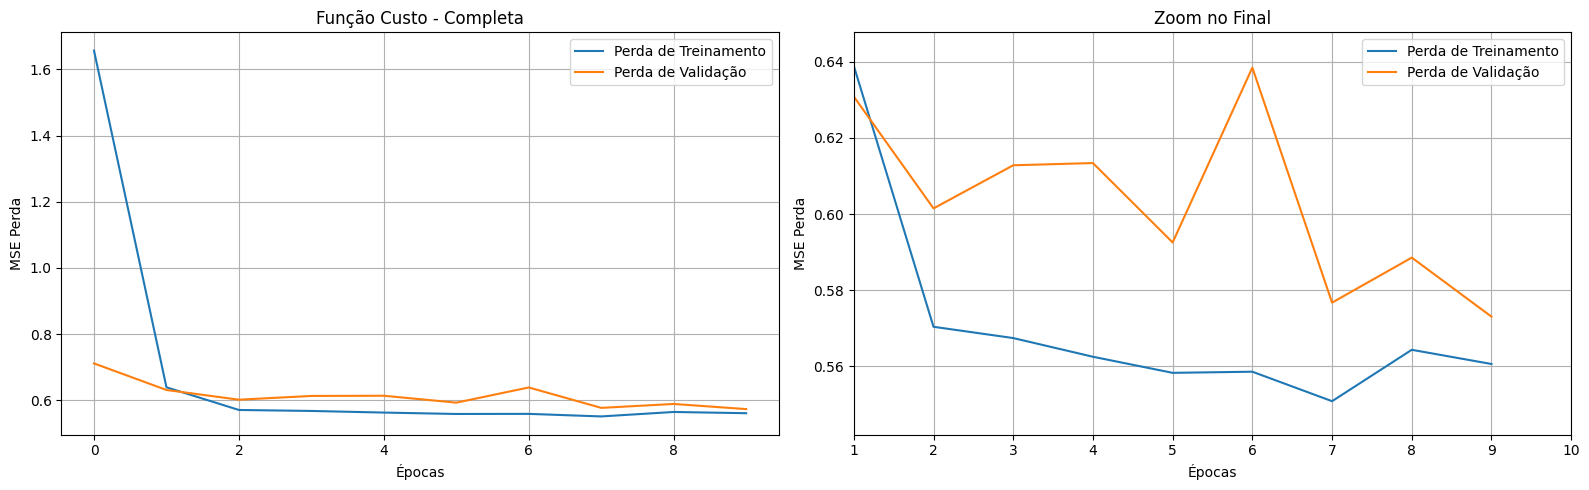

In [21]:
quick_info_s(train_losses=train_losses, val_losses=val_losses, w=w, y_val=y_s_val, X_val=X_s_val, X_t_val=X_t_s_val)

### Otimização de Hiperparâmetros: Taxa de Aprendizagem (Learning Rate)

Considerando os resultados iniciais, uma das primeiras etapas de otimização exploradas foi o ajuste da **taxa de aprendizagem (learning rate)** do otimizador SGD. Foram testados diferentes valores para observar seu impacto na convergência e no Erro Médio Absoluto (MAE) final.


----------

num_epoche=4
learning_rate=0.25
Iniciando treinamento
Época [0/4]
  Erro Total Médio Treinamento: [1.5305]
  Erro Total Médio Validação: [0.9152]

Época [2/4]
  Erro Total Médio Treinamento: [0.6585]
  Erro Total Médio Validação: [0.6840]

MAE:
   Modelo: 0.60
   Trivial: 0.69
   12.62% Melhor

Acurácia:
   Modelo: 0.51
   Acuracia Trivial: 0.44

Variância:
   Modelo: 0.61
   Variancia trivial: 0.78


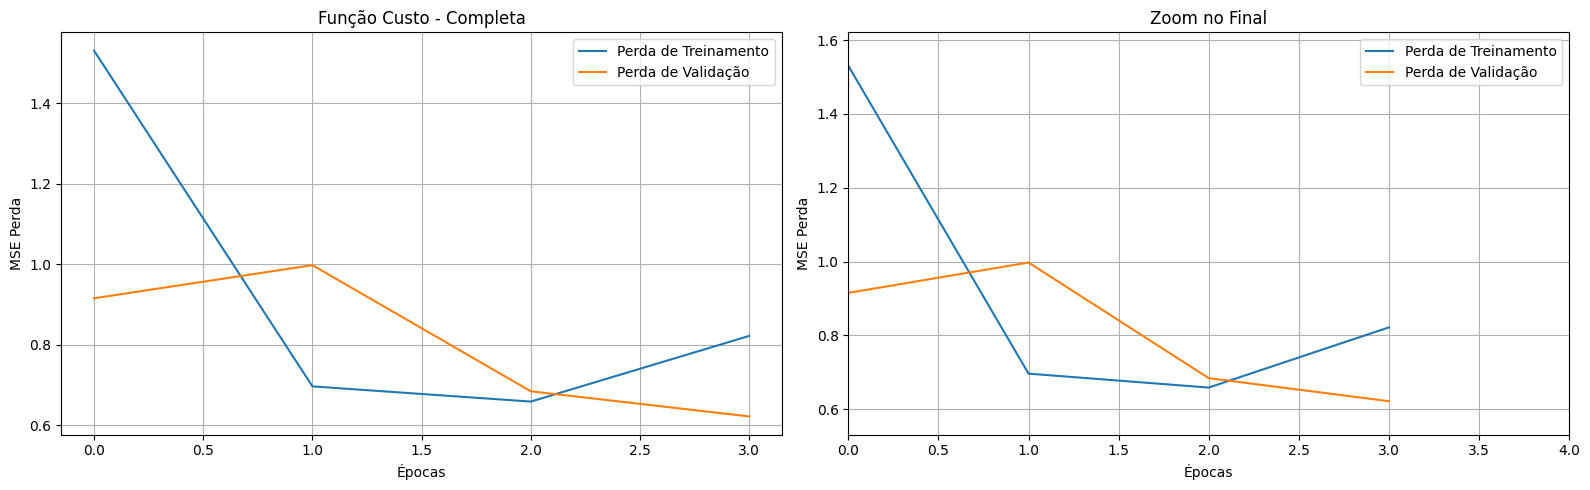


----------

num_epoche=16
learning_rate=0.0625
Iniciando treinamento
Época [0/16]
  Erro Total Médio Treinamento: [1.7069]
  Erro Total Médio Validação: [0.7769]

Época [6/16]
  Erro Total Médio Treinamento: [0.5593]
  Erro Total Médio Validação: [0.6068]

Época [12/16]
  Erro Total Médio Treinamento: [0.5438]
  Erro Total Médio Validação: [0.5706]

MAE:
   Modelo: 0.62
   Trivial: 0.69
   9.82% Melhor

Acurácia:
   Modelo: 0.50
   Acuracia Trivial: 0.44

Variância:
   Modelo: 0.66
   Variancia trivial: 0.78


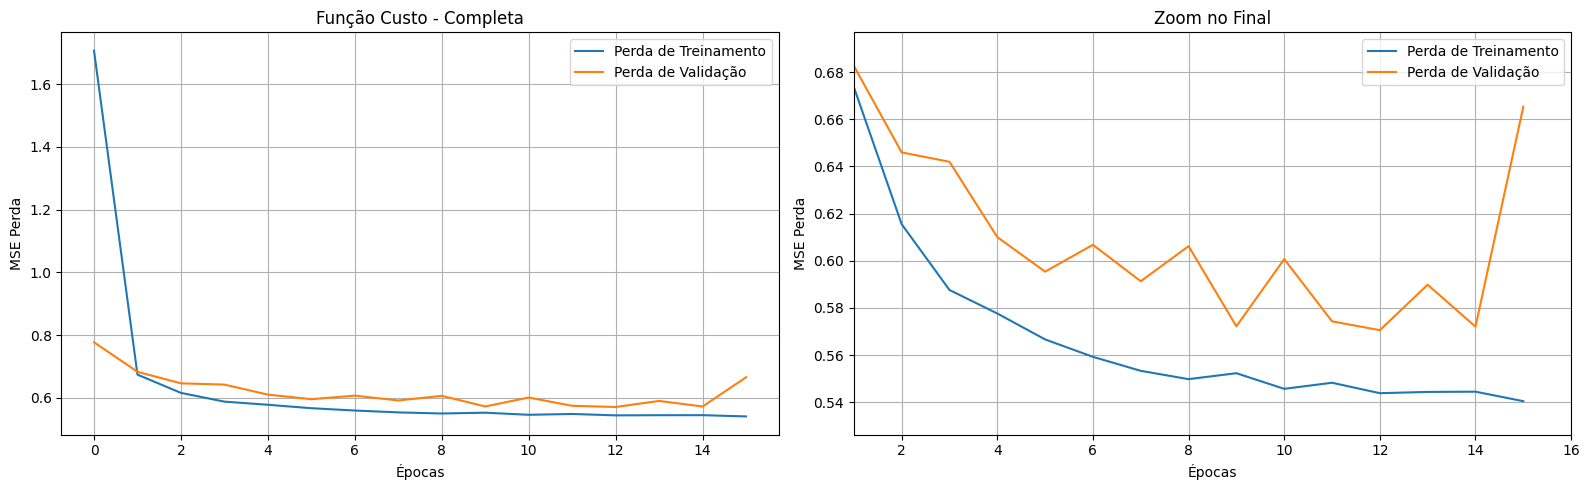


----------

num_epoche=64
learning_rate=0.015625
Iniciando treinamento
Época [0/64]
  Erro Total Médio Treinamento: [5.9384]
  Erro Total Médio Validação: [1.8627]

Época [22/64]
  Erro Total Médio Treinamento: [0.5511]
  Erro Total Médio Validação: [0.5972]

Época [44/64]
  Erro Total Médio Treinamento: [0.5323]
  Erro Total Médio Validação: [0.5713]

MAE:
   Modelo: 0.58
   Trivial: 0.69
   16.18% Melhor

Acurácia:
   Modelo: 0.53
   Acuracia Trivial: 0.44

Variância:
   Modelo: 0.56
   Variancia trivial: 0.78


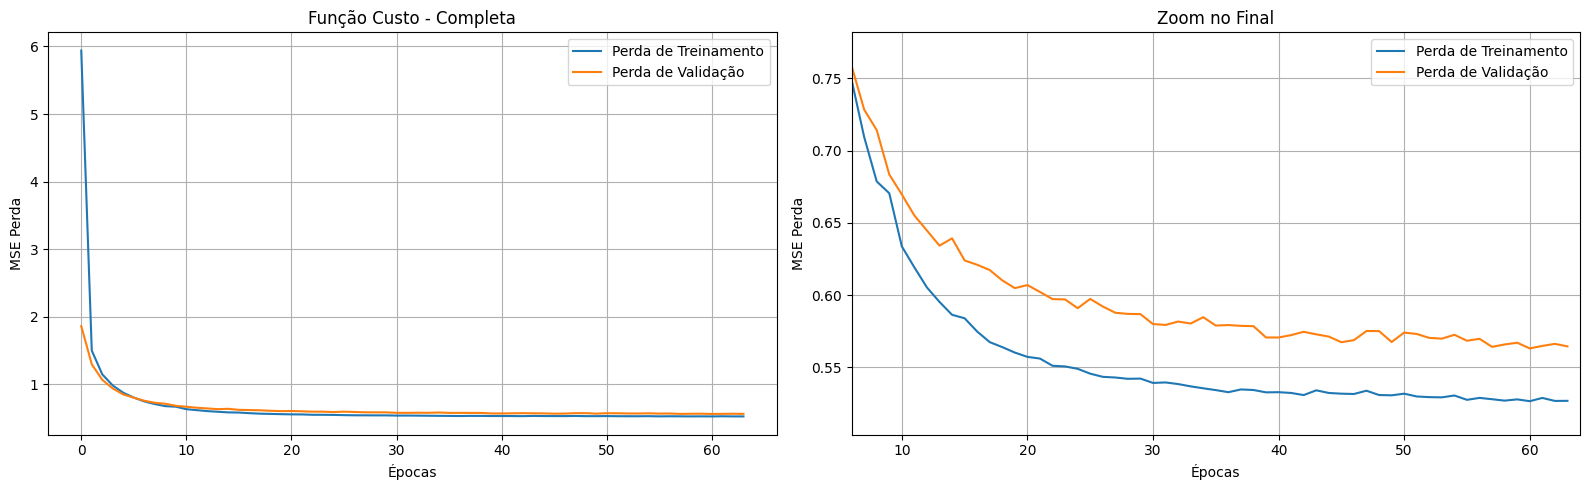


----------

num_epoche=256
learning_rate=0.00390625
Iniciando treinamento
Época [0/256]
  Erro Total Médio Treinamento: [14.6237]
  Erro Total Médio Validação: [5.8085]

Época [86/256]
  Erro Total Médio Treinamento: [0.5337]
  Erro Total Médio Validação: [0.5749]

Época [172/256]
  Erro Total Médio Treinamento: [0.5238]
  Erro Total Médio Validação: [0.5641]

MAE:
   Modelo: 0.58
   Trivial: 0.69
   16.38% Melhor

Acurácia:
   Modelo: 0.53
   Acuracia Trivial: 0.44

Variância:
   Modelo: 0.56
   Variancia trivial: 0.78


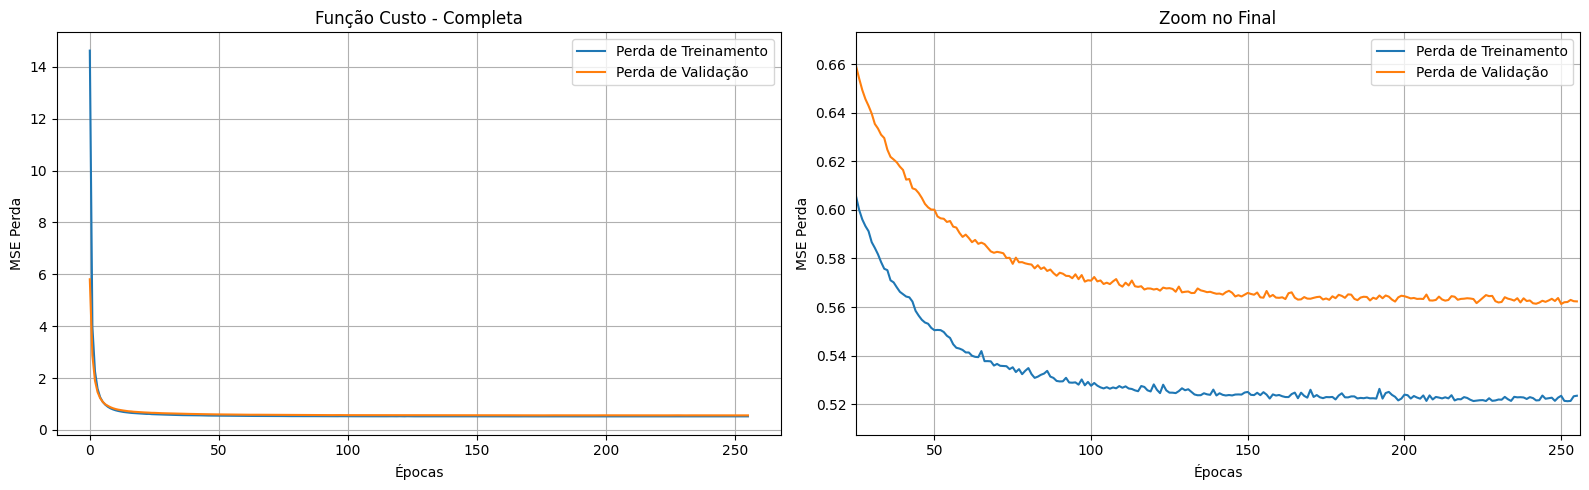


----------

num_epoche=1024
learning_rate=0.0009765625
Iniciando treinamento
Época [0/1_024]
  Erro Total Médio Treinamento: [38.0317]
  Erro Total Médio Validação: [24.3518]

Época [342/1_024]
  Erro Total Médio Treinamento: [0.5320]
  Erro Total Médio Validação: [0.5756]

Época [684/1_024]
  Erro Total Médio Treinamento: [0.5222]
  Erro Total Médio Validação: [0.5644]

MAE:
   Modelo: 0.58
   Trivial: 0.69
   16.34% Melhor

Acurácia:
   Modelo: 0.53
   Acuracia Trivial: 0.44

Variância:
   Modelo: 0.56
   Variancia trivial: 0.78


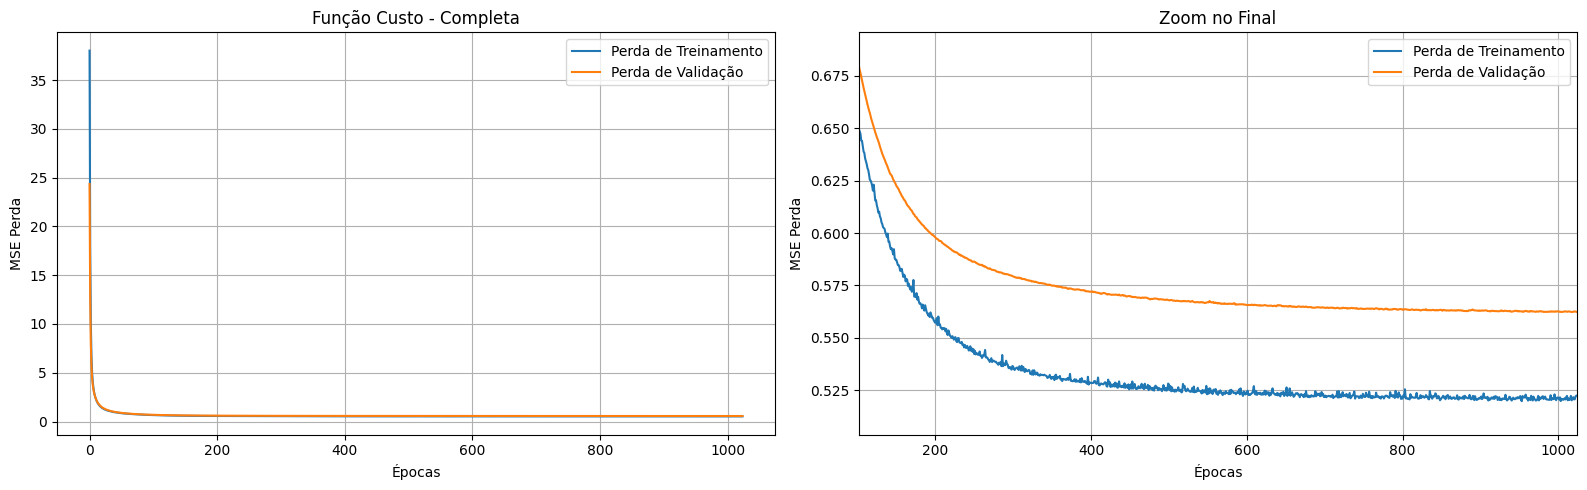

In [22]:
for i in range(1, 10, 2):
    print(f"\n{'-'*10}\n")
    num_epoche = 2 << i
    learning_rate = 1 / num_epoche
    print(f"{num_epoche=}")
    print(f"{learning_rate=}")
    train_losses, val_losses, w = train_s_model(
        train_loader=s_train_loader,
        val_loader=s_val_loader,
        num_epoches=num_epoche,
        learning_rate=learning_rate,
    )
    
    quick_info_s(train_losses=train_losses, val_losses=val_losses, w=w, y_val=y_s_val, X_val=X_s_val, X_t_val=X_t_s_val)

A experimentação com a taxa de aprendizagem demonstrou que, embora certas faixas apresentassem uma convergência mais rápida ou um MAE marginalmente melhor, o ganho geral de performance permaneceu limitado. 

num_epoche=30
learning_rate=0.05
Iniciando treinamento
Época [0/30]
  Erro Total Médio Treinamento: [2.6949]
  Erro Total Médio Validação: [0.8425]

Época [10/30]
  Erro Total Médio Treinamento: [0.5356]
  Erro Total Médio Validação: [0.6242]

Época [20/30]
  Erro Total Médio Treinamento: [0.5355]
  Erro Total Médio Validação: [0.5699]

MAE:
   Modelo: 0.58
   Trivial: 0.69
   15.59% Melhor

Acurácia:
   Modelo: 0.53
   Acuracia Trivial: 0.44

Variância:
   Modelo: 0.56
   Variancia trivial: 0.78


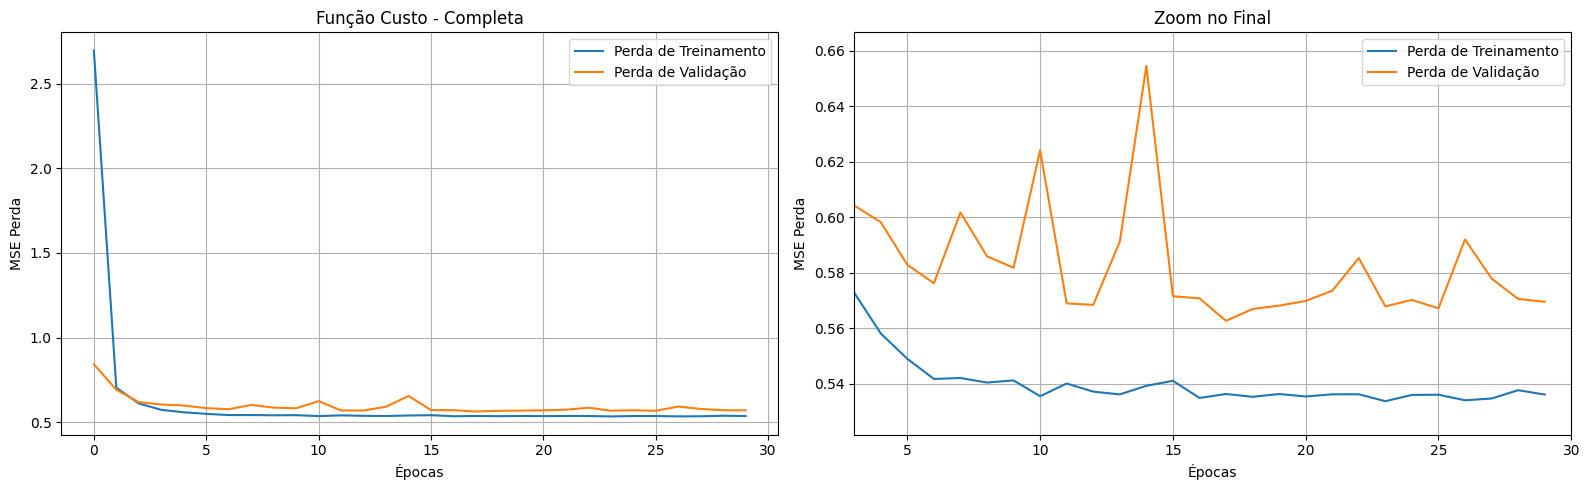

In [23]:
num_epoche = 30
learning_rate = 5e-2
print(f"{num_epoche=}")
print(f"{learning_rate=}")
train_losses, val_losses, w = train_s_model(
    train_loader=s_train_loader,
    val_loader=s_val_loader,
    num_epoches=num_epoche,
    learning_rate=learning_rate,
)

quick_info_s(
    train_losses=train_losses,
    val_losses=val_losses,
    w=w,
    y_val=y_s_val,
    X_val=X_s_val,
    X_t_val=X_t_s_val,
)

### Análise de Importância das Features (Pesos do Modelo) e Redução Iterativa

Com o objetivo de entender melhor as limitações do modelo e a possível relevância das diferentes features, procedeu-se a uma análise dos pesos (`w`) aprendidos pelo modelo de Regressão Linear. A magnitude dos pesos (após normalização das features) pode oferecer uma indicação da influência de cada feature na predição da qualidade do vinho.

In [24]:
squared_sums = torch.sqrt(
    (w**2).sum(dim=0)
)  # Peguei a media quadratica dos valores, para ver qual era o menor
min_idx = torch.argmin(squared_sums).item()
max_idx = torch.argmax(squared_sums).item()

min_feature = df_s_val.columns[min_idx]
max_feature = df_s_val.columns[max_idx]

min_value = squared_sums[min_idx].item()
max_value = squared_sums[max_idx].item()

ignore = min_feature

print(f"{ignore} é a variavel mais insignificativa")

citric acid é a variavel mais insignificativa



----------

num_epoche=4
learning_rate=0.25
Iniciando treinamento
Época [0/4]
  Erro Total Médio Treinamento: [1.4326]
  Erro Total Médio Validação: [0.6873]

Época [2/4]
  Erro Total Médio Treinamento: [0.6650]
  Erro Total Médio Validação: [0.8244]

MAE:
   Modelo: 0.65
   Trivial: 0.69
   5.53% Melhor

Acurácia:
   Modelo: 0.46
   Acuracia Trivial: 0.44

Variância:
   Modelo: 0.70
   Variancia trivial: 0.78


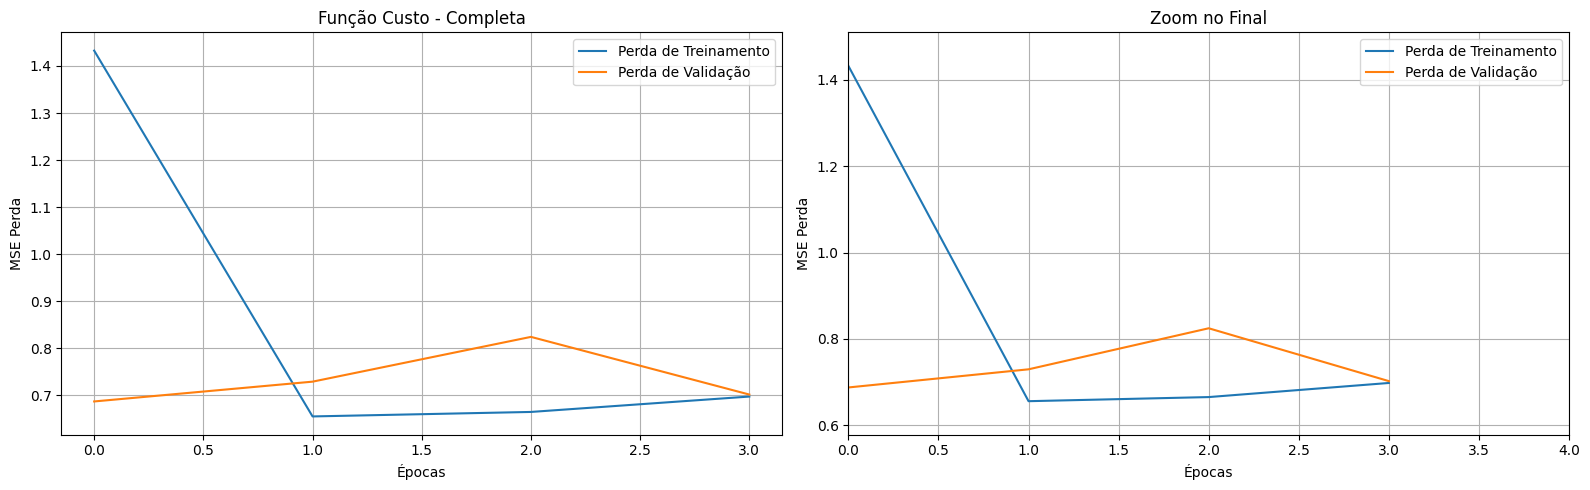


----------

num_epoche=16
learning_rate=0.0625
Iniciando treinamento
Época [0/16]
  Erro Total Médio Treinamento: [3.4117]
  Erro Total Médio Validação: [0.8948]

Época [6/16]
  Erro Total Médio Treinamento: [0.5517]
  Erro Total Médio Validação: [0.6155]

Época [12/16]
  Erro Total Médio Treinamento: [0.5392]
  Erro Total Médio Validação: [0.5706]

MAE:
   Modelo: 0.59
   Trivial: 0.69
   14.62% Melhor

Acurácia:
   Modelo: 0.52
   Acuracia Trivial: 0.44

Variância:
   Modelo: 0.58
   Variancia trivial: 0.78


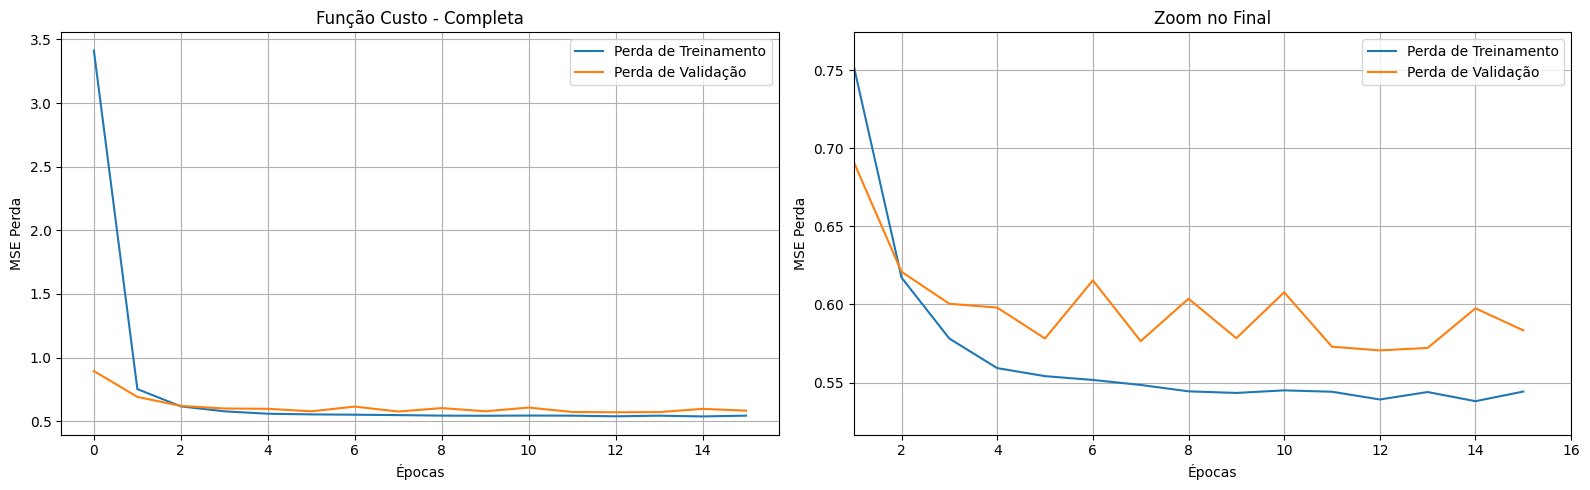


----------

num_epoche=64
learning_rate=0.015625
Iniciando treinamento
Época [0/64]
  Erro Total Médio Treinamento: [4.1905]
  Erro Total Médio Validação: [1.2744]

Época [22/64]
  Erro Total Médio Treinamento: [0.5436]
  Erro Total Médio Validação: [0.5973]

Época [44/64]
  Erro Total Médio Treinamento: [0.5290]
  Erro Total Médio Validação: [0.5694]

MAE:
   Modelo: 0.58
   Trivial: 0.69
   16.05% Melhor

Acurácia:
   Modelo: 0.52
   Acuracia Trivial: 0.44

Variância:
   Modelo: 0.56
   Variancia trivial: 0.78


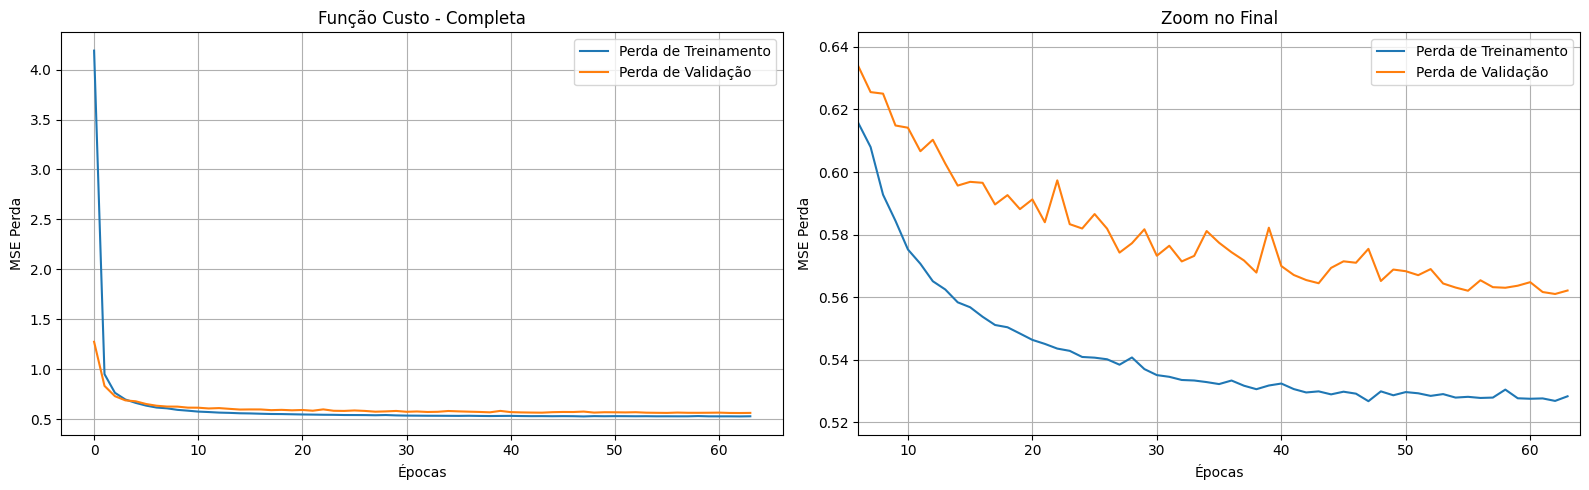


----------

num_epoche=256
learning_rate=0.00390625
Iniciando treinamento
Época [0/256]
  Erro Total Médio Treinamento: [11.2790]
  Erro Total Médio Validação: [4.5550]

Época [86/256]
  Erro Total Médio Treinamento: [0.5428]
  Erro Total Médio Validação: [0.5915]

Época [172/256]
  Erro Total Médio Treinamento: [0.5262]
  Erro Total Médio Validação: [0.5669]

MAE:
   Modelo: 0.58
   Trivial: 0.69
   16.30% Melhor

Acurácia:
   Modelo: 0.53
   Acuracia Trivial: 0.44

Variância:
   Modelo: 0.56
   Variancia trivial: 0.78


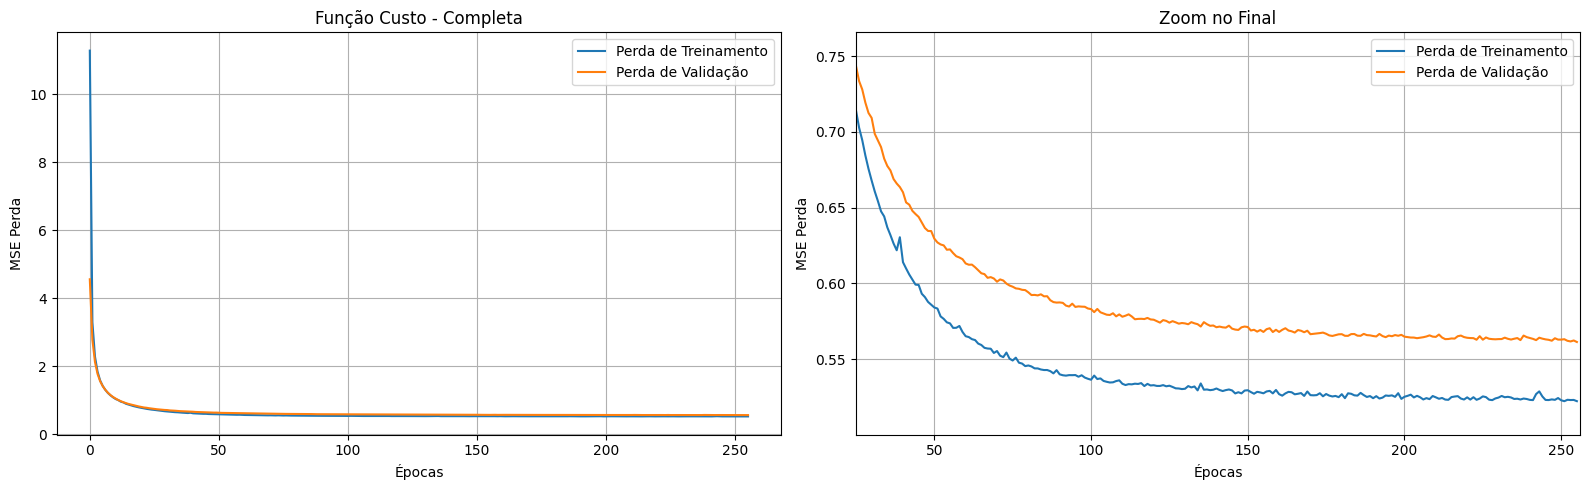


----------

num_epoche=1024
learning_rate=0.0009765625
Iniciando treinamento
Época [0/1_024]
  Erro Total Médio Treinamento: [28.5806]
  Erro Total Médio Validação: [19.1613]

Época [342/1_024]
  Erro Total Médio Treinamento: [0.5476]
  Erro Total Médio Validação: [0.6007]

Época [684/1_024]
  Erro Total Médio Treinamento: [0.5277]
  Erro Total Médio Validação: [0.5696]

MAE:
   Modelo: 0.58
   Trivial: 0.69
   16.23% Melhor

Acurácia:
   Modelo: 0.53
   Acuracia Trivial: 0.44

Variância:
   Modelo: 0.56
   Variancia trivial: 0.78


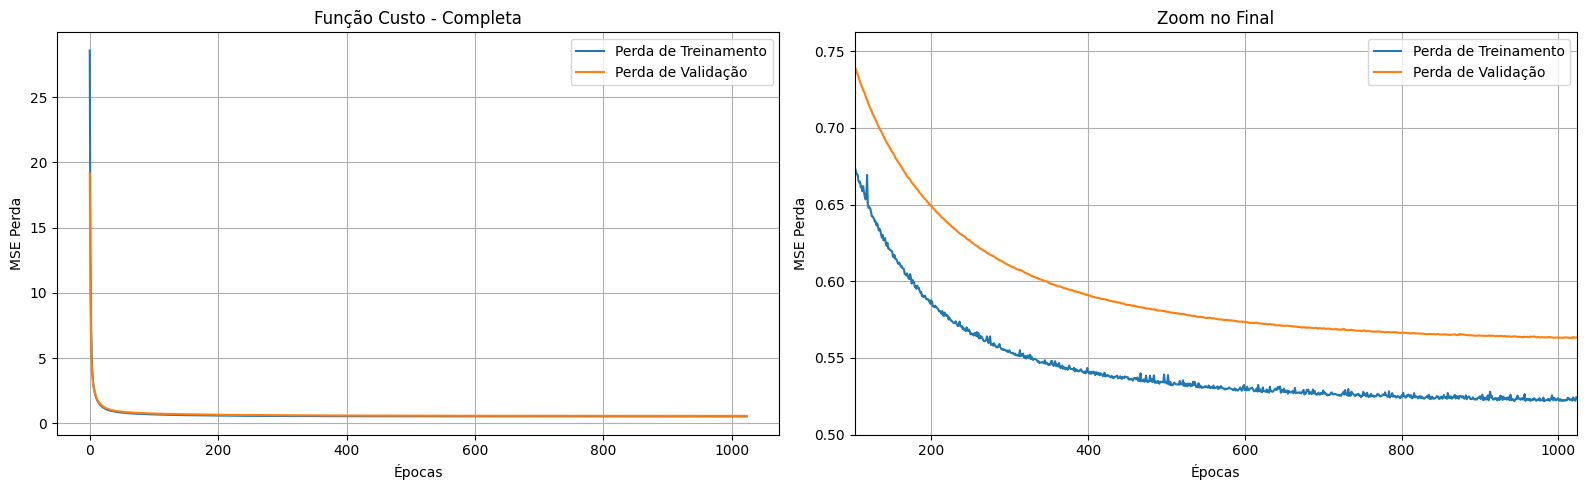

In [25]:
df_s_train_ = df_s_train.drop(columns=[ignore])
df_s_val_ = df_s_val.drop(columns=[ignore])

train_loader, val_loader, y_val, X_val, X_t_val = get_data_s(
    df_train=df_s_train_, df_val=df_s_val_
)

for i in range(1, 11, 2):
    print(f"\n{'-'*10}\n")
    num_epoche = 2 << i
    learning_rate = 1 / num_epoche
    print(f"{num_epoche=}")
    print(f"{learning_rate=}")
    train_losses, val_losses, w_ = train_s_model(
        train_loader=train_loader,
        val_loader=val_loader,
        num_epoches=num_epoche,
        learning_rate=learning_rate,
    )

    quick_info_s(
        train_losses=train_losses,
        val_losses=val_losses,
        w=w_,
        y_val=y_val,
        X_val=X_val,
        X_t_val=X_t_val,
    )

Vamos repetir o processo 

Iniciando treinamento
Época [0/10]
  Erro Total Médio Treinamento: [1.7945]
  Erro Total Médio Validação: [0.7573]

Época [4/10]
  Erro Total Médio Treinamento: [0.5672]
  Erro Total Médio Validação: [0.6401]

Época [8/10]
  Erro Total Médio Treinamento: [0.5532]
  Erro Total Médio Validação: [0.6140]

citric acid é a variavel mais insignificativa

----------

num_epoche=500
learning_rate=0.002
Iniciando treinamento
Época [0/500]
  Erro Total Médio Treinamento: [19.7018]
  Erro Total Médio Validação: [13.0192]

Época [167/500]
  Erro Total Médio Treinamento: [0.5357]
  Erro Total Médio Validação: [0.5760]

Época [334/500]
  Erro Total Médio Treinamento: [0.5237]
  Erro Total Médio Validação: [0.5632]

MAE:
   Modelo: 0.58
   Trivial: 0.69
   16.37% Melhor

Acurácia:
   Modelo: 0.53
   Acuracia Trivial: 0.44

Variância:
   Modelo: 0.56
   Variancia trivial: 0.78


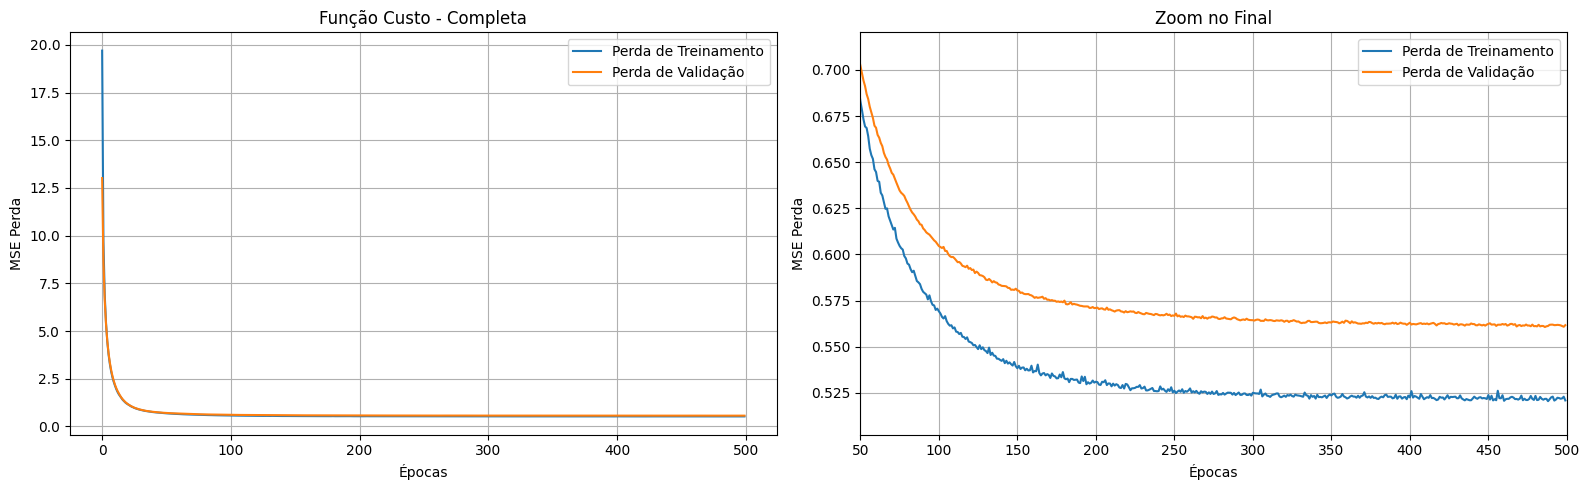

chlorides é a variavel mais insignificativa

----------

num_epoche=500
learning_rate=0.002
Iniciando treinamento
Época [0/500]
  Erro Total Médio Treinamento: [22.9150]
  Erro Total Médio Validação: [11.2896]

Época [167/500]
  Erro Total Médio Treinamento: [0.5722]
  Erro Total Médio Validação: [0.6388]

Época [334/500]
  Erro Total Médio Treinamento: [0.5344]
  Erro Total Médio Validação: [0.5803]

MAE:
   Modelo: 0.58
   Trivial: 0.69
   15.80% Melhor

Acurácia:
   Modelo: 0.53
   Acuracia Trivial: 0.44

Variância:
   Modelo: 0.56
   Variancia trivial: 0.78


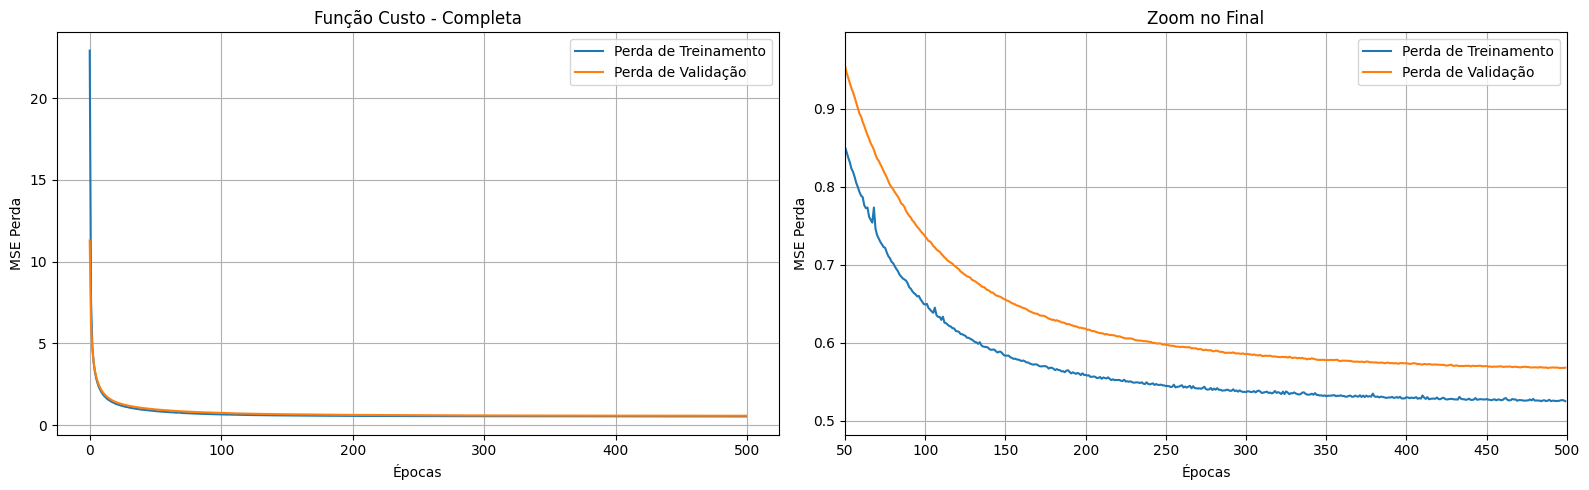

fixed acidity é a variavel mais insignificativa

----------

num_epoche=500
learning_rate=0.002
Iniciando treinamento
Época [0/500]
  Erro Total Médio Treinamento: [24.0459]
  Erro Total Médio Validação: [12.4242]

Época [167/500]
  Erro Total Médio Treinamento: [0.5565]
  Erro Total Médio Validação: [0.6150]

Época [334/500]
  Erro Total Médio Treinamento: [0.5283]
  Erro Total Médio Validação: [0.5738]

MAE:
   Modelo: 0.58
   Trivial: 0.69
   16.04% Melhor

Acurácia:
   Modelo: 0.54
   Acuracia Trivial: 0.44

Variância:
   Modelo: 0.56
   Variancia trivial: 0.78


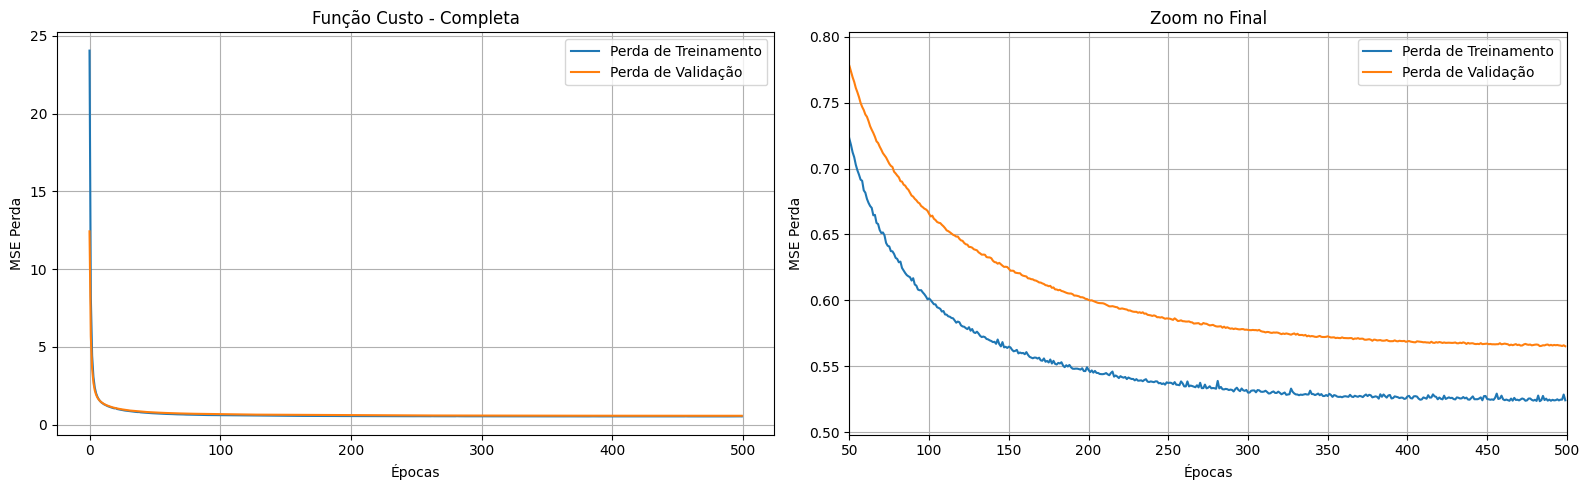

pH é a variavel mais insignificativa

----------

num_epoche=500
learning_rate=0.002
Iniciando treinamento
Época [0/500]
  Erro Total Médio Treinamento: [16.3565]
  Erro Total Médio Validação: [7.9949]

Época [167/500]
  Erro Total Médio Treinamento: [0.5467]
  Erro Total Médio Validação: [0.5968]

Época [334/500]
  Erro Total Médio Treinamento: [0.5314]
  Erro Total Médio Validação: [0.5729]

MAE:
   Modelo: 0.58
   Trivial: 0.69
   15.78% Melhor

Acurácia:
   Modelo: 0.53
   Acuracia Trivial: 0.44

Variância:
   Modelo: 0.56
   Variancia trivial: 0.78


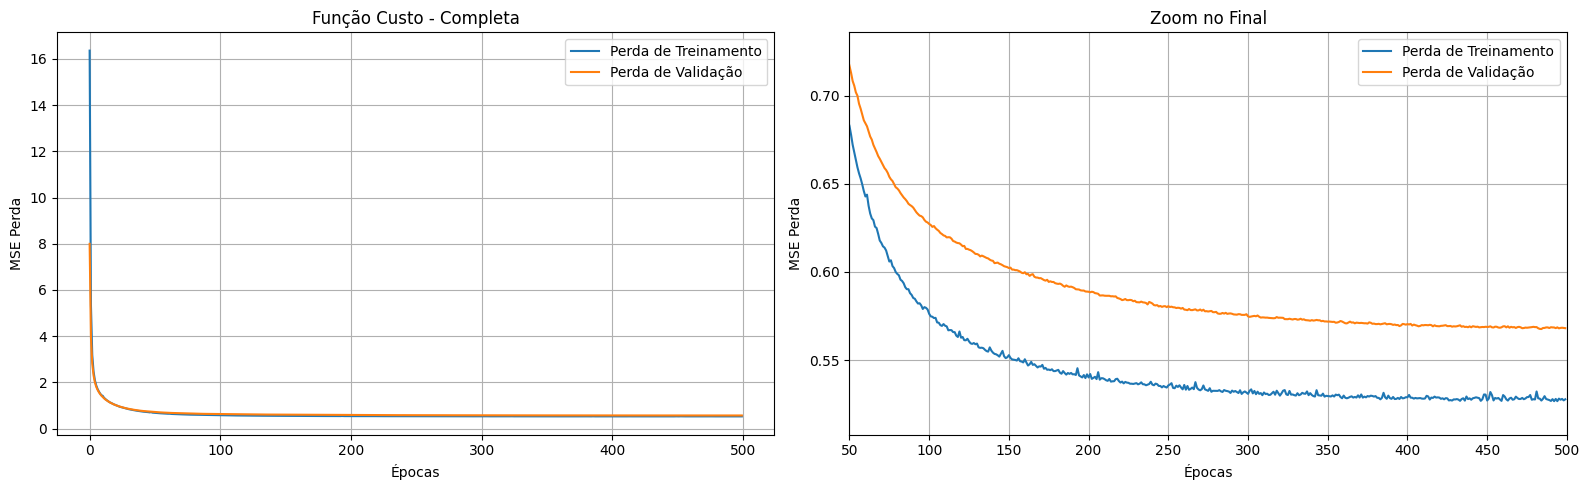

free sulfur dioxide é a variavel mais insignificativa

----------

num_epoche=500
learning_rate=0.002
Iniciando treinamento
Época [0/500]
  Erro Total Médio Treinamento: [16.4228]
  Erro Total Médio Validação: [8.0044]

Época [167/500]
  Erro Total Médio Treinamento: [0.5502]
  Erro Total Médio Validação: [0.5978]

Época [334/500]
  Erro Total Médio Treinamento: [0.5331]
  Erro Total Médio Validação: [0.5750]

MAE:
   Modelo: 0.58
   Trivial: 0.69
   15.49% Melhor

Acurácia:
   Modelo: 0.53
   Acuracia Trivial: 0.44

Variância:
   Modelo: 0.57
   Variancia trivial: 0.78


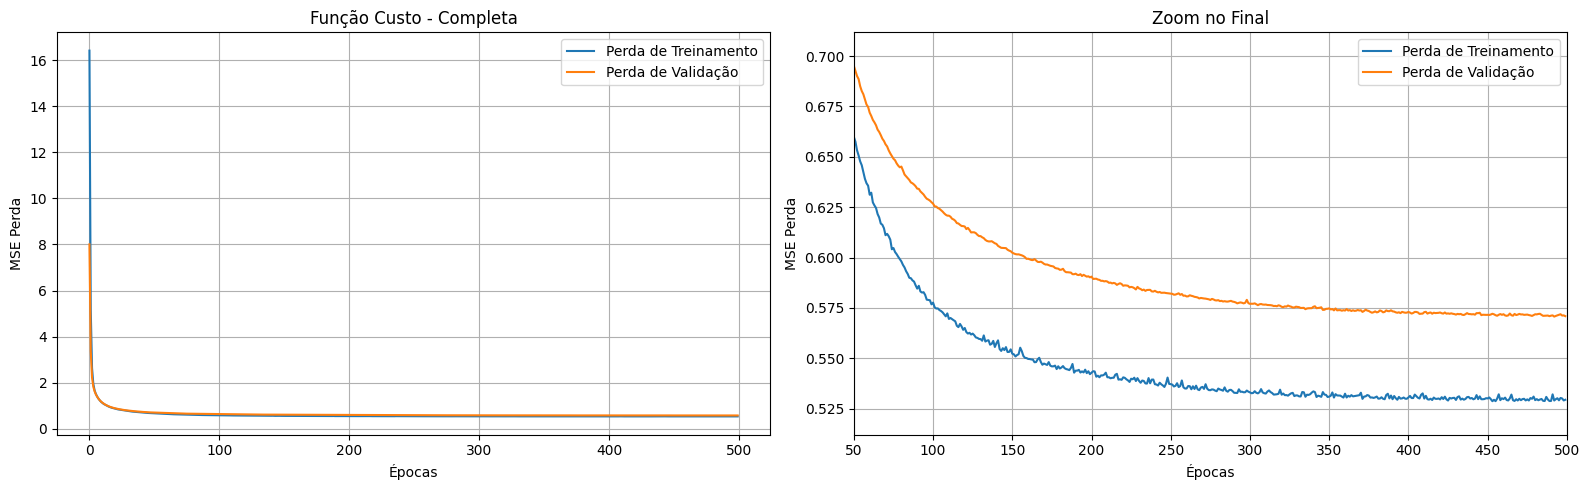

total sulfur dioxide é a variavel mais insignificativa

----------

num_epoche=500
learning_rate=0.002
Iniciando treinamento
Época [0/500]
  Erro Total Médio Treinamento: [17.8081]
  Erro Total Médio Validação: [10.1572]

Época [167/500]
  Erro Total Médio Treinamento: [0.5300]
  Erro Total Médio Validação: [0.5747]

Época [334/500]
  Erro Total Médio Treinamento: [0.5315]
  Erro Total Médio Validação: [0.5735]

MAE:
   Modelo: 0.58
   Trivial: 0.69
   15.25% Melhor

Acurácia:
   Modelo: 0.53
   Acuracia Trivial: 0.44

Variância:
   Modelo: 0.57
   Variancia trivial: 0.78


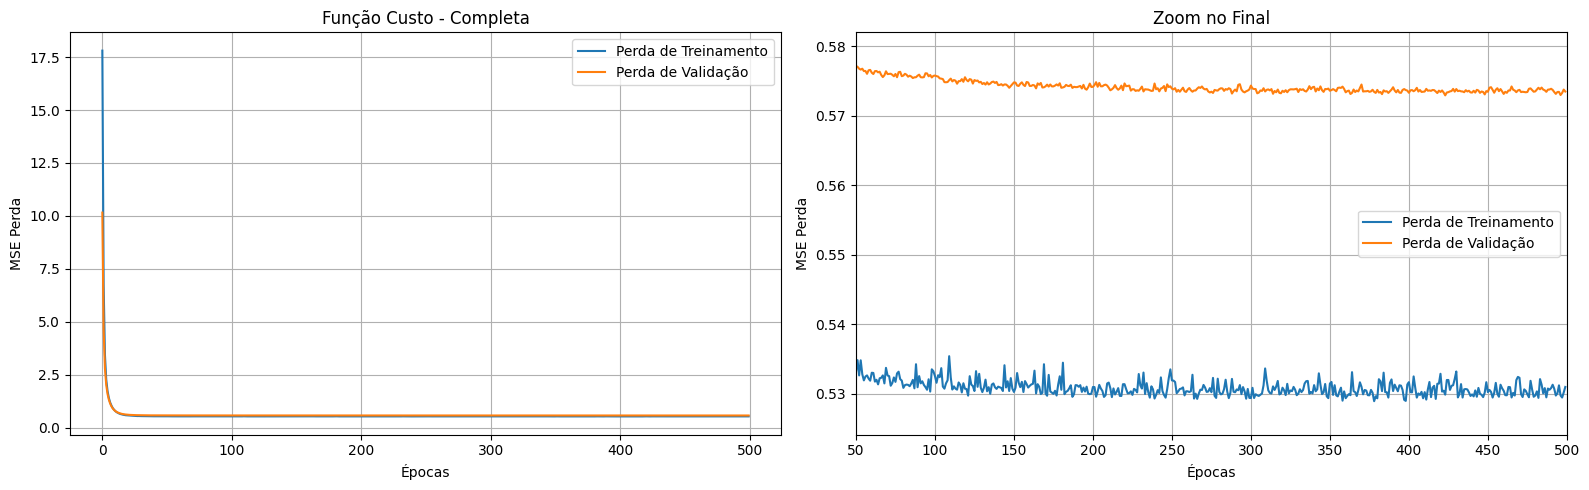

sulphates é a variavel mais insignificativa

----------

num_epoche=500
learning_rate=0.002
Iniciando treinamento
Época [0/500]
  Erro Total Médio Treinamento: [18.5670]
  Erro Total Médio Validação: [11.2185]

Época [167/500]
  Erro Total Médio Treinamento: [0.5949]
  Erro Total Médio Validação: [0.6801]

Época [334/500]
  Erro Total Médio Treinamento: [0.5462]
  Erro Total Médio Validação: [0.5983]

MAE:
   Modelo: 0.59
   Trivial: 0.69
   13.93% Melhor

Acurácia:
   Modelo: 0.52
   Acuracia Trivial: 0.44

Variância:
   Modelo: 0.58
   Variancia trivial: 0.78


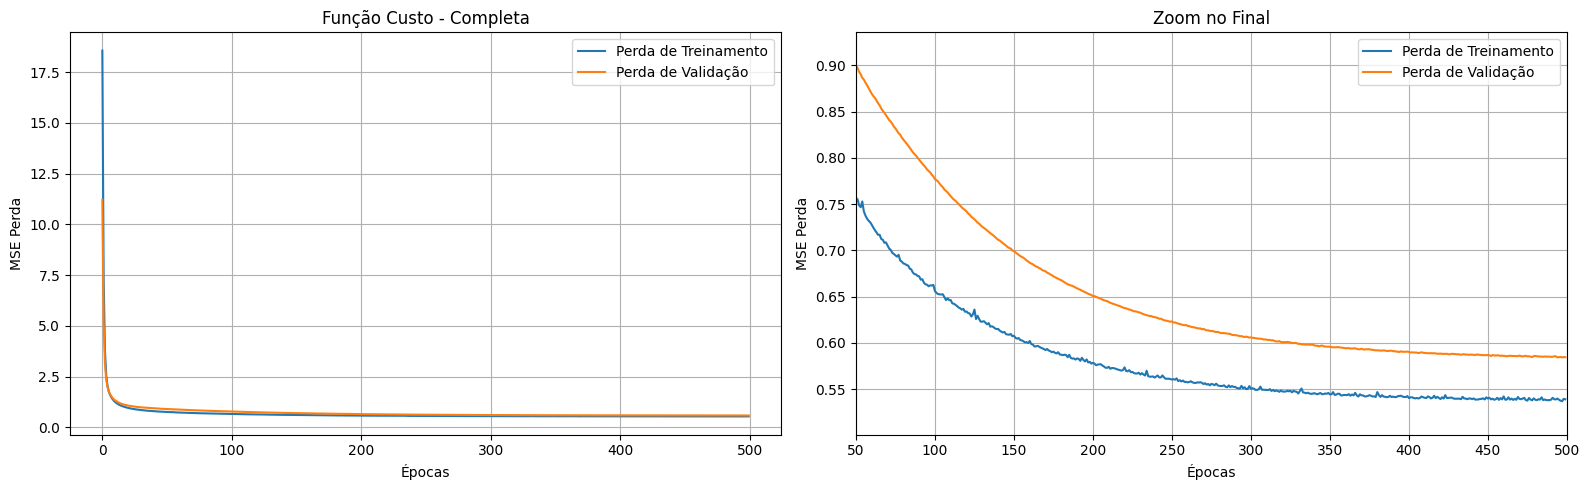

density é a variavel mais insignificativa

----------

num_epoche=500
learning_rate=0.002
Iniciando treinamento
Época [0/500]
  Erro Total Médio Treinamento: [15.8797]
  Erro Total Médio Validação: [8.6500]

Época [167/500]
  Erro Total Médio Treinamento: [0.5507]
  Erro Total Médio Validação: [0.6098]

Época [334/500]
  Erro Total Médio Treinamento: [0.5406]
  Erro Total Médio Validação: [0.5887]

MAE:
   Modelo: 0.59
   Trivial: 0.69
   14.17% Melhor

Acurácia:
   Modelo: 0.52
   Acuracia Trivial: 0.44

Variância:
   Modelo: 0.58
   Variancia trivial: 0.78


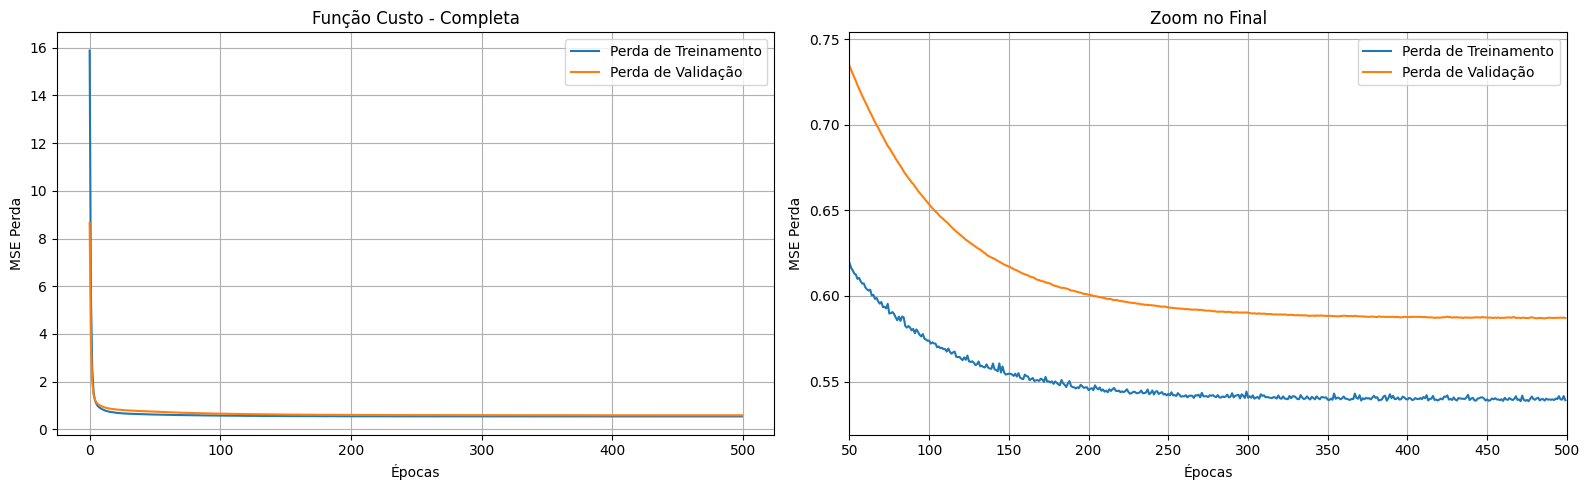

residual sugar é a variavel mais insignificativa

----------

num_epoche=500
learning_rate=0.002
Iniciando treinamento
Época [0/500]
  Erro Total Médio Treinamento: [43.8706]
  Erro Total Médio Validação: [25.0073]

Época [167/500]
  Erro Total Médio Treinamento: [0.5548]
  Erro Total Médio Validação: [0.5882]

Época [334/500]
  Erro Total Médio Treinamento: [0.5533]
  Erro Total Médio Validação: [0.5880]

MAE:
   Modelo: 0.59
   Trivial: 0.69
   14.17% Melhor

Acurácia:
   Modelo: 0.52
   Acuracia Trivial: 0.44

Variância:
   Modelo: 0.58
   Variancia trivial: 0.78


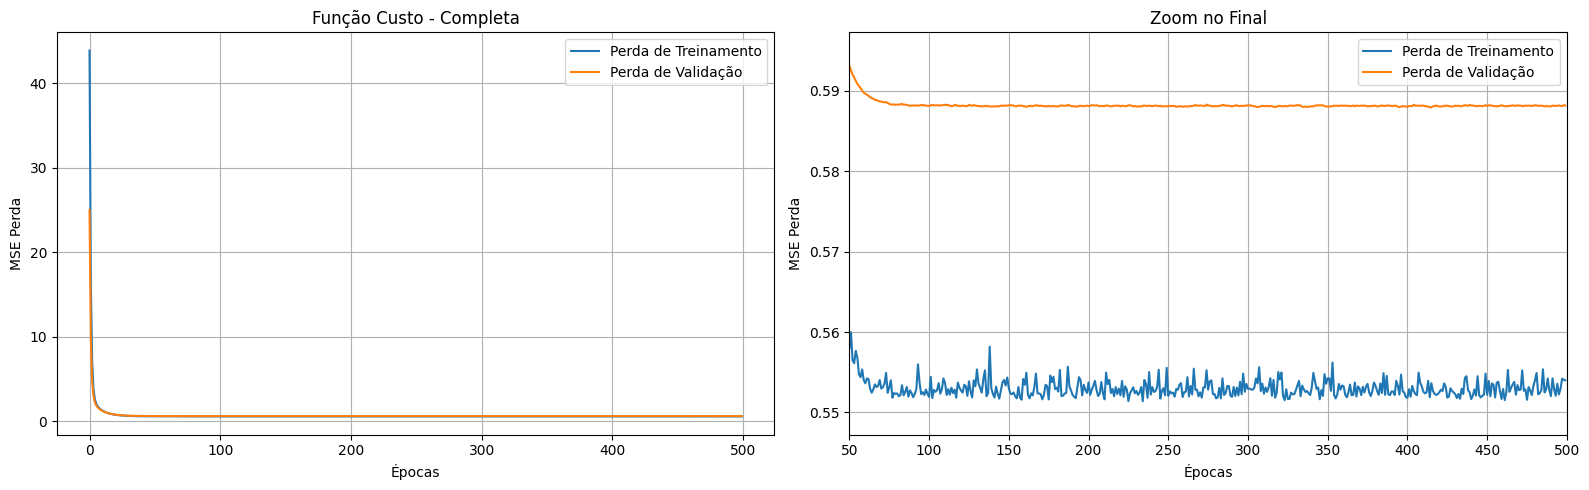

volatile acidity é a variavel mais insignificativa

----------

num_epoche=500
learning_rate=0.002
Iniciando treinamento
Época [0/500]
  Erro Total Médio Treinamento: [45.8779]
  Erro Total Médio Validação: [29.0145]

Época [167/500]
  Erro Total Médio Treinamento: [0.5972]
  Erro Total Médio Validação: [0.6290]

Época [334/500]
  Erro Total Médio Treinamento: [0.5985]
  Erro Total Médio Validação: [0.6291]

MAE:
   Modelo: 0.61
   Trivial: 0.69
   11.15% Melhor

Acurácia:
   Modelo: 0.51
   Acuracia Trivial: 0.44

Variância:
   Modelo: 0.62
   Variancia trivial: 0.78


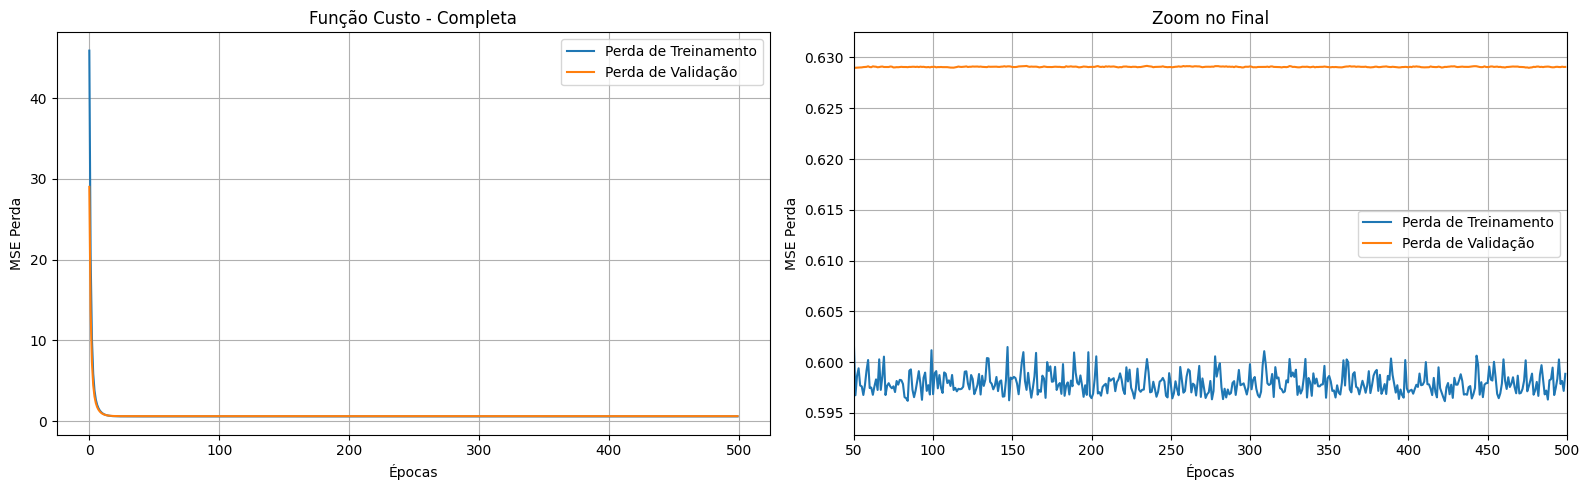

Variavel mais importante é Index(['alcohol'], dtype='object') e seu peso é tensor([0.4410, 0.3702], grad_fn=<SelectBackward0>)
MAE:
   Modelo: 0.61
   Trivial: 0.69
   11.15% Melhor

Acurácia:
   Modelo: 0.51
   Acuracia Trivial: 0.44

Variância:
   Modelo: 0.62
   Variancia trivial: 0.78


In [26]:
df_s_train = df_train.copy(deep=True)
df_s_val = df_val.copy(deep=True)

train_losses, val_losses, w = train_s_model(
    train_loader=s_train_loader,
    val_loader=s_val_loader,
    num_epoches=10,
    learning_rate=1e-1,
)

for _ in range(1, w.size(1) - 1): # 1 ignorando o bias, -1 para sobrar um valor 
    squared_sums = torch.sqrt((w ** 2).sum(dim=0))
    min_idx = torch.argmin(squared_sums).item()
    max_idx = torch.argmax(squared_sums).item()
    min_feature = df_s_val.columns[min_idx]
    max_feature = df_s_val.columns[max_idx]
    min_value = squared_sums[min_idx].item()
    max_value = squared_sums[max_idx].item()
    ignore = min_feature
    print(f"{ignore} é a variavel mais insignificativa")

    df_s_train = df_s_train.drop(columns=[ignore])
    df_s_val = df_s_val.drop(columns=[ignore])

    train_loader, val_loader, y_val, X_val, X_t_val = get_data_s(
        df_train=df_s_train, df_val=df_s_val
    )

    
    print(f"\n{'-'*10}\n")
    num_epoche = 500
    learning_rate = 1 / num_epoche
    print(f"{num_epoche=}")
    print(f"{learning_rate=}")
    
    train_losses, val_losses, w = train_s_model(
        train_loader=train_loader,
        val_loader=val_loader,
        num_epoches=num_epoche,
        learning_rate=learning_rate,
    )
    
    quick_info_s(
        train_losses=train_losses,
        val_losses=val_losses,
        w=w,
        y_val=y_val,
        X_val=X_val,
        X_t_val=X_t_val,
    )

ignore = df_s_val.drop(columns=["quality", "type_red", "type_white"]).columns
print(f"Variavel mais importante é {ignore} e seu peso é {w[:, 0]}")

pred = get_s_model_pred(X=X_val, X_t=X_t_val, w=w)

mae = get_MAE(y=y_val, pred=pred)
acc = get_ACC(y=y_val, pred=pred)
var = get_VAR(y=y_val, pred=pred)

print(
    "MAE:\n  ",
    f"Modelo: {mae:.2f}\n  ",
    f"Trivial: {mae_r:.2f}\n  ",
    f"{100 - mae/mae_r * 100:.2f}% Melhor\n",
)
print(
    f"Acurácia:\n  ",
    f"Modelo: {acc:.2f}\n  ",
    f"Acuracia Trivial: {acc_r:.2f}\n",
)
print(
    f"Variância:\n  ",
    f"Modelo: {var:.2f}\n  ",
    f"Variancia trivial: {varr_r:.2f}",
)

### Conclusões Preliminares e Reflexões

Observou-se que a feature `alcohol` consistentemente apresentava o maior peso (em magnitude absoluta) em comparação com as demais.

Os resultados obtidos através dessas iterações sugerem algumas hipóteses:

1.  **Limitações da Regressão Linear:** É possível que um modelo linear simples não seja suficiente para capturar a complexidade das relações entre as características físico-químicas e a percepção sensorial da qualidade do vinho. A relação pode ser não-linear ou envolver interações entre features que a regressão linear padrão não modela.
2.  **Dominância da Feature `alcohol`:** Os experimentos indicam que, dentro da capacidade do modelo linear treinado, a variável `alcohol` parece ser a principal, ou uma das poucas, com poder preditivo discernível para a qualidade do vinho. Isso não significa necessariamente que outras features sejam irrelevantes na realidade, mas que o modelo linear, com os dados e o pré-processamento, não conseguiu extrair sinais fortes delas.
3.  **Subjetividade da Variável Alvo:** A "qualidade" do vinho, avaliada por provadores, possui um componente inerente de subjetividade, o que pode tornar a predição uma tarefa intrinsecamente ruidosa e difícil para qualquer modelo.

## Abordagem 2: Modelo com Vetor de Pesos Único

Nesta seção, exploraremos a segunda estratégia de modelagem proposta: a utilização de um **vetor de pesos único** para todas as amostras, independentemente do tipo de vinho (tinto ou branco). Esta é uma abordagem mais convencional para problemas de regressão, onde todas as features, incluindo aquelas que representam categorias (como o tipo de vinho, após a codificação One-Hot), são tratadas de forma unificada.

**Princípio:**
Diferentemente da abordagem segmentada, onde poderíamos ter conjuntos de pesos distintos para vinhos tintos e brancos, aqui o modelo aprenderá um único conjunto de pesos `w`. A coluna `type_white` (estrei removendo a `type_red`) serão tratadas como quaisquer outras features numéricas, contribuindo para a predição final através de seus respectivos pesos.

O modelo de regressão linear permanece o mesmo:

$$ \hat{y} = X\vec{w} $$

Onde `X` agora inclui as colunas indicadoras de tipo como features regulares.

**Preparação dos Dados (`df_u`):**
A preparação dos dados para esta abordagem seguirá um fluxo similar ao da primeira, mas com uma diferença crucial: as colunas indicadoras de tipo serão mantidas como parte da matriz de features `X` durante todo o processo.

As etapas incluirão:

1.  **Separação da Variável Alvo (`y`):** Extrair a coluna `quality`.
2.  **Definição das Features (`X`):** Selecionar todas as colunas preditoras, **incluindo** as colunas `type_white`, e excluindo apenas a variável alvo `quality`.
3.  **Normalização das Features:** Aplicar a normalização (por exemplo, Z-score Standardization) a todas as colunas de features em `X`, ajustando o normalizador nos dados de treinamento (`X_u_train`) e aplicando-o a `X_u_train` e `X_u_val`.
4.  **Conversão para Tensor e Ajuste Dimensional:** Transformar `X` e `y` em tensores PyTorch, garantindo os `dtypes` e `shapes` corretos.
5.  **Incorporação do Termo de Bias:** Adicionar a coluna de '1's aos tensores de features (`X_u_train`, `X_u_val`) para contabilizar o intercepto.

Similarmente à abordagem anterior, encapsularemos essas etapas de preparação em uma função para facilitar a reutilização e a clareza.

**Expectativa:**
Esta abordagem é mais simples em termos de estrutura do modelo, pois não requer lógica especial para lidar com diferentes tipos de vinho. No entanto, sua capacidade de modelar diferenças sutis entre vinhos tintos e brancos pode ser limitada se a relação entre as features e a qualidade for significativamente diferente para os dois tipos. A avaliação comparará seu desempenho com o da abordagem segmentada e com o baseline.

### Preparação dos Dados para o Modelo Unificado (`df_u`)

Para a abordagem com **Vetor de Pesos Único**, utilizaremos os DataFrames `df_u_train` e `df_u_val`. O processo de preparação dos dados é semelhante ao da abordagem segmentada, com a diferença principal residindo no tratamento das colunas indicadoras de tipo (`type_white`, `type_red`). Nesta abordagem, estas colunas são consideradas como features numéricas regulares e farão parte da matriz `X` que será alimentada ao modelo.

As etapas de preparação são as seguintes:

1.  **Definição das Features (`X_u`) e da Variável Alvo (`y_u`):**
    *   **Variável Alvo (`y_u`):** A coluna `quality` é extraída dos DataFrames `df_u_train` e `df_u_val`.
    *   **Features (`X_u`):** Todas as colunas restantes em `df_u_train` e `df_u_val` (após a remoção da coluna `quality` e `type_white`) são consideradas como features. Isso **inclui** a coluna a `type_red`.

2.  **Normalização das Features:**
    *   As colunas de features em `X_u_train` e `X_u_val` serão normalizadas.
    *   Um normalizador (por exemplo, `StandardScaler` do `scikit-learn`) será ajustado (**fit**) utilizando **apenas** os dados de `X_u_train`.
    *   A transformação de normalização (`transform`) será então aplicada a ambos os conjuntos, `X_u_train` e `X_u_val`, utilizando os parâmetros (média e desvio padrão) aprendidos do conjunto de treinamento.

3.  **Conversão para Tensores PyTorch e Ajuste Dimensional:**
    *   Os arrays NumPy ou DataFrames resultantes (features normalizadas e variável alvo) serão convertidos para tensores PyTorch (`torch.Tensor`).
    *   Será garantido que os tensores tenham o tipo de dado (`dtype`) adequado (e.g., `torch.float32`).
    *   As dimensões (`shape`) dos tensores serão ajustadas conforme o esperado:
        *   Features (`X_u`): `[número_de_amostras, número_de_features_incluindo_tipo]`
        *   Alvo (`y_u`): `[número_de_amostras, 1]`


In [27]:
# Decidi remover type_white
df_u_train_ = df_u_train.drop(columns=["type_white"])
df_u_val_ = df_u_val.drop(columns=["type_white"])

# Tensor de Treino do alvo
print(f"{'Treinamento':^35}")
y_u_train = df_u_train_["quality"].to_numpy()
print(f"{'Valores Alvo Treinamento':-^35}> {y_u_train.shape}")

# Tensor Valor de entrada treinamento
X_u_train = df_u_train_.drop(columns=["quality"]).to_numpy()
print(f"{'Valores de Entrada Treinamento':-^35}> {X_u_train.shape}")


# Tensor de Validação do alvo
print(f"\n{'Validação':^35}")
y_u_val = df_u_val_["quality"].to_numpy()
print(f"{'Valores Alvo Validação':-^35}> {y_u_val.shape}")

# Tensor Valor de entrada Validação
X_u_val = df_u_val_.drop(columns=["quality"]).to_numpy()
print(f"{'Valores de Entrada Validação':-^35}> {X_u_val.shape}")

            Treinamento            
-----Valores Alvo Treinamento------> (5197,)
--Valores de Entrada Treinamento---> (5197, 12)

             Validação             
------Valores Alvo Validação-------> (1300,)
---Valores de Entrada Validação----> (1300, 12)


### Normalização das Variáveis Preditoras (Features) [Ab.2]

As variáveis preditoras (features) em nosso conjunto de dados 
(`X_u_train` e `X_u_val`) possuem escalas e unidades distintas.  
Essas discrepâncias nas escalas podem prejudicar o processo de treinamento de modelos 
baseados em gradiente, como a Regressão Linear treinada com Gradiente Descendente.

**Motivação:**

1.  **Convergência do Otimizador:**  
    Features com valores numericamente muito maiores podem dominar o cálculo do gradiente, 
    levando a atualizações desproporcionais nos pesos correspondentes.  
    Isso pode fazer com que o otimizador (Gradiente Descendente) oscile ou demore mais para 
    convergir para uma solução ótima.  
    A normalização coloca todas as features em uma escala comparável, 
    resultando em um processo de otimização mais estável e, frequentemente, mais rápido.
2.  **Interpretação e Análise:**  
    Embora a normalização altere a interpretação direta dos coeficientes 
    (eles passam a representar a mudança na variável alvo para uma 
    mudança de *desvio padrão* na feature, se usar Z-score), 
    ela pode facilitar a comparação da importância relativa das diferentes 
    features com base na magnitude de seus pesos *após* o treinamento, 
    já que todas estarão na mesma escala.

**Método:**
Aplicaremos uma técnica de normalização (ou padronização) aos dados das features.  
Uma abordagem comum é a **Padronização Z-score (Standardization)**, 
que transforma os dados para terem média 0 e desvio padrão 1.

In [28]:
scaler_u = StandardScaler()

scaler_u.fit(X_u_train)

X_u_train = scaler_u.transform(X_u_train)
print(f"{'Valores de Entrada Treinamento':-^35}> {X_u_train.shape}")
print(f"{'Media':-^35}> {np.round(X_u_train.mean(axis=0), decimals=12)}")
print(f"{'Standart Deviation':-^35}> {X_u_train.std(axis=0)}\n")

X_u_val = scaler_u.transform(X_u_val)
print(f"{'Valores de Entrada Validação':-^35}> {X_u_val.shape}")
print(f"{'Media':-^35}> {np.round(X_u_val.mean(axis=0))}")
print(f"{'Standart Deviation':-^35}> {np.round(X_u_val.std(axis=0), decimals=2)}")

--Valores de Entrada Treinamento---> (5197, 12)
---------------Media---------------> [ 0. -0.  0. -0. -0.  0.  0. -0. -0.  0.  0.  0.]
--------Standart Deviation---------> [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

---Valores de Entrada Validação----> (1300, 12)
---------------Media---------------> [-0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.]
--------Standart Deviation---------> [0.98 1.   1.03 0.96 0.89 0.99 0.99 0.98 1.01 0.97 1.   1.  ]


### Conversão para Tensores PyTorch e Ajuste Dimensional [Ab.2]

Após a normalização das features, os dados (atualmente em formato NumPy array) 
precisam ser convertidos para o formato fundamental utilizado pela biblioteca PyTorch: 
os **Tensores (`torch.Tensor`)**. Os modelos de machine learning e as operações de 
cálculo de gradiente no PyTorch operam exclusivamente sobre esses objetos.

In [29]:
print(f"{'Treinamento':^35}")
y_u_train = torch.tensor(y_u_train, dtype=torch.float32).unsqueeze(1)
print(f"{'Valores Alvo Treinamento':-^35}> {y_u_train.shape}")
X_u_train = torch.tensor(X_u_train, dtype=torch.float32)
print(f"{'Valores de Entrada Treinamento':-^35}> {X_u_train.shape}")


print(f"{'Validação':^35}")
y_u_val = torch.tensor(y_u_val, dtype=torch.float32).unsqueeze(1)
print(f"{'Valores Alvo Validação':-^35}> {y_u_val.shape}")
X_u_val = torch.tensor(X_u_val, dtype=torch.float32)
print(f"{'Valores de Entrada Validação':-^35}> {X_u_val.shape}")

            Treinamento            
-----Valores Alvo Treinamento------> torch.Size([5197, 1])
--Valores de Entrada Treinamento---> torch.Size([5197, 12])
             Validação             
------Valores Alvo Validação-------> torch.Size([1300, 1])
---Valores de Entrada Validação----> torch.Size([1300, 12])


### Processamento em Lotes (Batch Processing) com `Dataset` e `DataLoader` [Ab.2]

Ao treinar modelos de machine learning, especialmente com grandes conjuntos de dados, 
processar todo o dataset de uma só vez para calcular cada atualização de pesos 
(como no Gradiente Descendente *Batch*) pode ser computacionalmente caro e lento.  
Além disso, usar abordagens estocásticas (como SGD ou Mini-batch GD) que operam sobre 
subconjuntos menores dos dados (batches) a cada iteração frequentemente leva a uma 
convergência mais rápida e pode ajudar o modelo a escapar de mínimos locais ruins.

In [30]:
batch_size = 32

u_train_dataset = TensorDataset(X_u_train, y_u_train)
u_train_loader = DataLoader(u_train_dataset, batch_size=batch_size, shuffle=True)
print("Data Loader de Treinamento carregado.")

u_val_dataset = TensorDataset(X_u_val, y_u_val)
u_val_loader = DataLoader(u_val_dataset, batch_size=batch_size, shuffle=False)
print("Data Loader de Validação carregado.")

Data Loader de Treinamento carregado.
Data Loader de Validação carregado.


### Refatoração: Função para Preparação de Dados [Ab.2]

Para consolidar as etapas de pré-processamento realizadas até agora para a abordagem de 
**Matriz de Pesos Único** e promover a reutilização do código, definiremos uma função Python. 
Esta função encapsulará toda a lógica de preparação dos dados, desde a separação inicial das colunas 
até a conversão final em tensores PyTorch prontos para o treinamento e validação.

In [31]:
def get_data_u(
    df_train: pd.DataFrame, df_val: pd.DataFrame, batch_size: int = 32
) -> tuple[DataLoader, DataLoader, torch.Tensor, torch.Tensor]:
    """Resgata os Tensores necessário para treinar e validar o modelo linear segmentado"""

    # Decidi remover type_white
    df_train = df_train.drop(columns=["type_white"])
    df_val = df_val.drop(columns=["type_white"])

    # Tensor de Treino do alvo
    y_train = df_train["quality"].to_numpy()
    X_train = df_train.drop(columns=["quality"]).to_numpy()

    # Tensor de Validação do alvo
    y_val = df_val["quality"].to_numpy()
    X_val = df_val.drop(columns=["quality"]).to_numpy()

    # Normalization
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_val = scaler.transform(X_val)

    # To torch
    y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
    X_train = torch.tensor(X_train, dtype=torch.float32)

    y_val = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)
    X_val = torch.tensor(X_val, dtype=torch.float32)

    # To dataLoader
    train_dataset = TensorDataset(X_train, y_train)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    val_dataset = TensorDataset(X_val, y_val)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, val_loader, y_val, X_val 

### Definição da Classe do Modelo de Regressão Linear (Único)

Para a abordagem com vetor de pesos único, definimos o modelo de Regressão Linear como uma classe Python que herda de `torch.nn.Module`. Esta é a classe base para todos os módulos de rede neural em PyTorch e fornece funcionalidades essenciais para o gerenciamento de parâmetros (pesos e bias), movimentação do modelo entre dispositivos (CPU/GPU), e outras operações.

A arquitetura do nosso modelo é simples, consistindo em uma única camada linear:

In [32]:
class LinearRegressionModel(torch.nn.Module):
    def __init__(self, input_dim: int):
        super().__init__()
        self.linear = torch.nn.Linear(input_dim, 1)

        self.linear.weight.data.normal_(0, 0.01)
        self.linear.bias.data.fill_(0)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear(x)

### Funções de Treinamento e Validação por Época

Para organizar o processo de treinamento e avaliação, definimos duas funções principais: `train_epoch` e `validate_epoch`. Essas funções lidam com uma única passagem completa (época) sobre os dados de treinamento ou validação, respectivamente.

**1. Função `train_epoch`**

Esta função executa uma única época de treinamento. Ela itera sobre todos os batches fornecidos pelo `DataLoader` de treinamento, realiza a passagem para frente (forward pass), calcula a perda, executa a retropropagação (backpropagation) e atualiza os pesos do modelo usando o otimizador.

**2. Função ``validate_epoch``**
Esta função executa uma única época de avaliação. Ela itera sobre todos os batches do ``DataLoader`` de validação (ou teste), calcula a perda, mas não realiza retropropagação nem atualiza os pesos do modelo. O decorador ``@torch.no_grad()`` é usado para desabilitar o cálculo de gradientes durante esta fase, economizando memória e processamento.

In [33]:
def train_epoch(
    model: torch.nn.Module,
    loader: DataLoader,
    loss_fn: torch.nn.Module,
    optimizer: torch.optim.Optimizer,
):
    model.train()
    total_loss = 0.0
    for X, y in loader:
        optimizer.zero_grad()
        preds = model(X)
        loss: torch.Tensor = loss_fn(preds, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

@torch.no_grad()
def validate_epoch(
    model: torch.nn.Module,
    loader: DataLoader,
    loss_fn: torch.nn.Module,
):
    model.eval()
    total_loss = 0.0
    for X, y in loader:
        preds = model(X)
        total_loss += loss_fn(preds, y).item()
    return total_loss / len(loader)

### Função Unificada de Treinamento, Validação e Avaliação do Modelo (`eval_model_u`)

Para simplificar a execução e a experimentação com o modelo de vetor de pesos único, foi desenvolvida a função `eval_model_u`. Esta função orquestra todo o processo, desde a preparação dos dados até o treinamento do modelo por múltiplas épocas, a validação e, opcionalmente, a exibição de informações de desempenho e gráficos.

In [34]:
def eval_model_u(
    df_train: pd.DataFrame,
    df_val: pd.DataFrame,
    batch_size: int = 32,
    lr: float = 1e-2,
    n_epoches: int = 20,
    show_info: bool = True,
    show_epoche_info: bool = True,
    show_graph: bool = True,
) -> None | str:
    train_loader, val_loader, y_val, X_val = get_data_u(
        df_train=df_train, df_val=df_val, batch_size=batch_size
    )

    batch = next(iter(val_loader))
    input_dim = batch[0].shape[1]

    model = LinearRegressionModel(input_dim=input_dim)
    loss_fn = torch.nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    train_losses, val_losses = [], []

    for epoche in range(1, n_epoches + 1):
        train_loss = train_epoch(
            model=model, loader=train_loader, loss_fn=loss_fn, optimizer=optimizer
        )
        val_loss = validate_epoch(model=model, loader=val_loader, loss_fn=loss_fn)
        train_losses.append(train_loss)
        val_losses.append(val_loss)

        if show_epoche_info and ((epoche) % (np.ceil(n_epoches / 4)) == 0):
            print(
                (
                    f"Época [{epoche:_}/{n_epoches:_}]\n  "
                    f"Erro Total Médio Treinamento: [{train_loss:.4f}]\n  "
                    f"Erro Total Médio Validação: [{val_loss:.4f}]\n"
                )
            )

    if show_graph:
        plot_that(train_losses=train_losses, val_losses=val_losses)
    if show_info:
        min_name = compare_to_trivial(
            model=model,
            y_val=y_val,
            X_val=X_val,
            df=df_val.drop(columns=["type_white", "quality"]),
        )
        return min_name


@torch.no_grad()
def compare_to_trivial(
    y_val: torch.Tensor, X_val: torch.Tensor, model: torch.nn.Module, df: pd.DataFrame
) -> str:
    model.eval()

    tri_pred = torch.full_like(y_val, y_val.mean())
    pred = model(X_val)

    tri_mae = get_MAE(y=y_val, pred=tri_pred)
    tri_acc = get_ACC(y=y_val, pred=tri_pred)
    tri_var = get_VAR(y=y_val, pred=tri_pred)

    mae = get_MAE(y=y_val, pred=pred)
    acc = get_ACC(y=y_val, pred=pred)
    var = get_VAR(y=y_val, pred=pred)

    weights: torch.Tensor = model.linear.weight
    bias: torch.Tensor = model.linear.bias

    weights = weights.squeeze(0)
    abs_w = torch.abs(weights)

    min_idx = torch.argmin(abs_w).item()
    min_val = weights[min_idx].item()
    min_name = df.columns[min_idx]

    max_idx = torch.argmax(abs_w).item()
    max_val = weights[max_idx].item()
    max_name = df.columns[max_idx]

    print(
        "MAE:",
        f"  Modelo: {mae:.2f}",
        f"  Trivial: {tri_mae:.2f}",
        f"  {100 - mae/tri_mae * 100:.2f}% Melhor\n",
        "Acurácia:",
        f"  Modelo: {acc:.2f}",
        f"  Acuracia Trivial: {tri_acc:.2f}\n",
        "Variância:",
        f"  Modelo: {var:.2f}",
        f"  Variancia trivial: {tri_var:.2f}\n",
        f"Pesos: {weights}\n",
        f"Víes: {bias}\n",
        f"Peso mais insignificativo é {min_name} com valor {min_val:.4f}",
        f"Peso mais significativo é {max_name} com valor {max_val:.4f} ",
        sep="\n",
    )
    return min_name

Época [25/100]
  Erro Total Médio Treinamento: [0.5321]
  Erro Total Médio Validação: [0.5741]

Época [50/100]
  Erro Total Médio Treinamento: [0.5321]
  Erro Total Médio Validação: [0.5757]

Época [75/100]
  Erro Total Médio Treinamento: [0.5306]
  Erro Total Médio Validação: [0.5735]

Época [100/100]
  Erro Total Médio Treinamento: [0.5320]
  Erro Total Médio Validação: [0.5766]



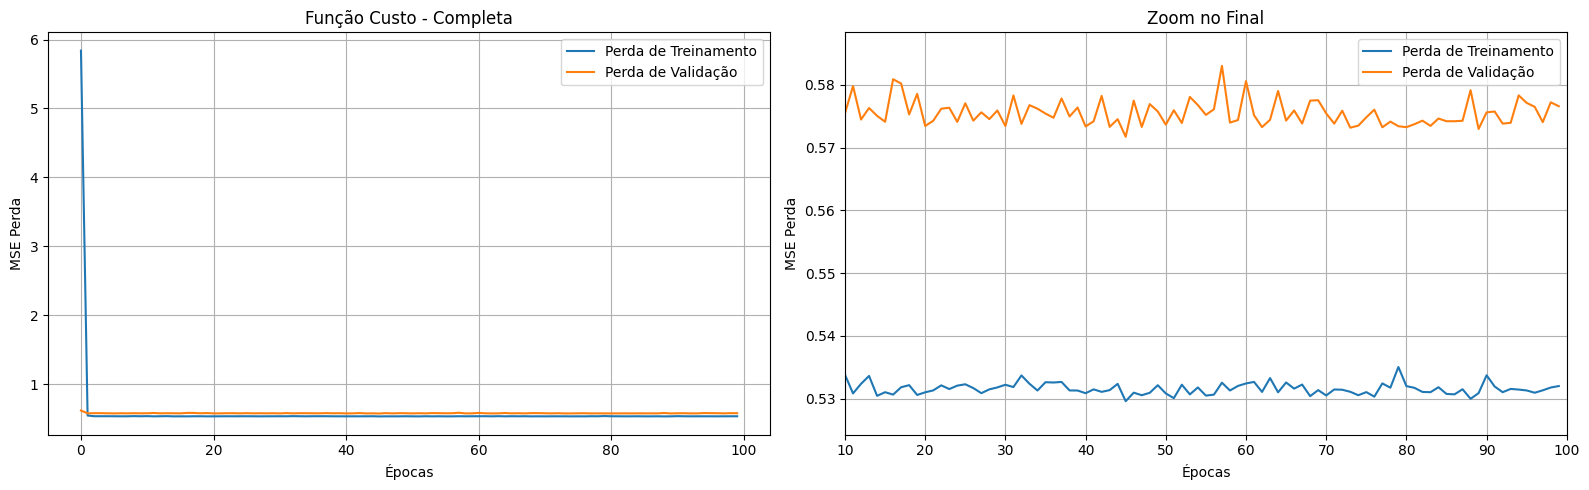

MAE:
  Modelo: 0.58
  Trivial: 0.69
  16.36% Melhor

Acurácia:
  Modelo: 0.53
  Acuracia Trivial: 0.44

Variância:
  Modelo: 0.57
  Variancia trivial: 0.78

Pesos: tensor([ 0.1034, -0.2575, -0.0161,  0.3176, -0.0186,  0.0880, -0.0654, -0.2994,
         0.0969,  0.1234,  0.2521,  0.1498], requires_grad=True)

Víes: Parameter containing:
tensor([5.8205], requires_grad=True)

Peso mais insignificativo é citric acid com valor -0.0161
Peso mais significativo é residual sugar com valor 0.3176 


'citric acid'

In [35]:
eval_model_u(df_train=df_u_train, df_val=df_u_val, n_epoches=100)

### Otimização de Hiperparâmetros e Análise de Features (Modelo Unificado)

Com o pipeline de treinamento e avaliação para o modelo unificado (`eval_model_u`) estabelecido, procedemos a uma série de experimentos para investigar o impacto de diferentes hiperparâmetros e para realizar uma análise de sensibilidade das features. O objetivo é identificar configurações que possam otimizar o desempenho do modelo ou fornecer insights sobre a importância das variáveis.

#### 1. Variação do Número de Épocas

O número de épocas de treinamento determina quantas vezes o modelo completo passará pelo conjunto de dados de treinamento. Um número insuficiente de épocas pode levar a um subajuste (*underfitting*), enquanto um número excessivo pode resultar em superajuste (*overfitting*) aos dados de treinamento, além de aumentar o tempo computacional.


Número de Épocas: 5


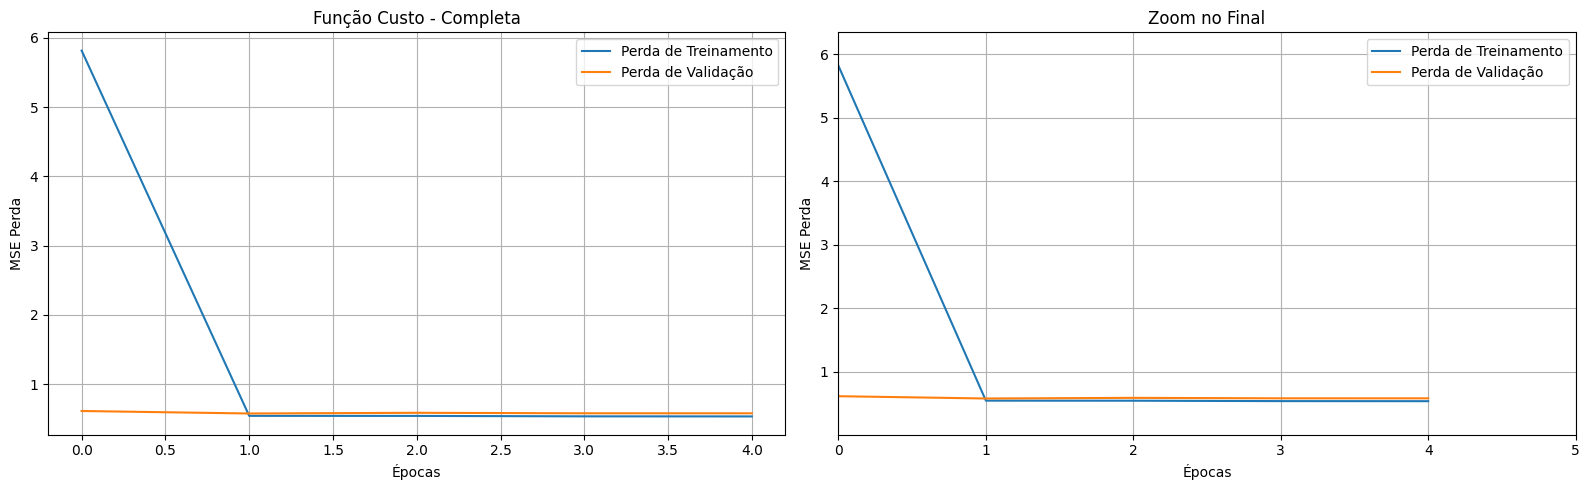

MAE:
  Modelo: 0.58
  Trivial: 0.69
  16.42% Melhor

Acurácia:
  Modelo: 0.52
  Acuracia Trivial: 0.44

Variância:
  Modelo: 0.57
  Variancia trivial: 0.78

Pesos: tensor([ 0.0428, -0.2544, -0.0362,  0.2084, -0.0394,  0.1012, -0.0840, -0.1351,
         0.0490,  0.0920,  0.3283,  0.0853], requires_grad=True)

Víes: Parameter containing:
tensor([5.8161], requires_grad=True)

Peso mais insignificativo é citric acid com valor -0.0362
Peso mais significativo é alcohol com valor 0.3283 
--------------------

Número de Épocas: 30


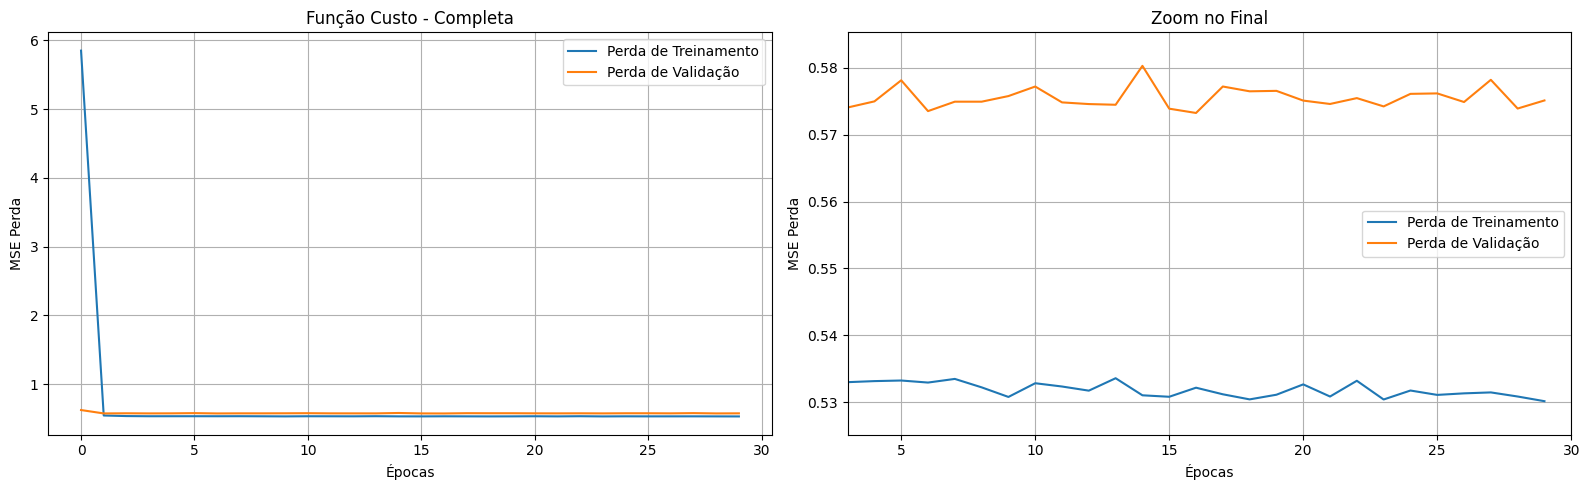

MAE:
  Modelo: 0.58
  Trivial: 0.69
  16.41% Melhor

Acurácia:
  Modelo: 0.53
  Acuracia Trivial: 0.44

Variância:
  Modelo: 0.57
  Variancia trivial: 0.78

Pesos: tensor([ 0.1102, -0.2523, -0.0063,  0.3000, -0.0215,  0.0831, -0.0838, -0.2831,
         0.0759,  0.1151,  0.2780,  0.1486], requires_grad=True)

Víes: Parameter containing:
tensor([5.8369], requires_grad=True)

Peso mais insignificativo é citric acid com valor -0.0063
Peso mais significativo é residual sugar com valor 0.3000 
--------------------

Número de Épocas: 55


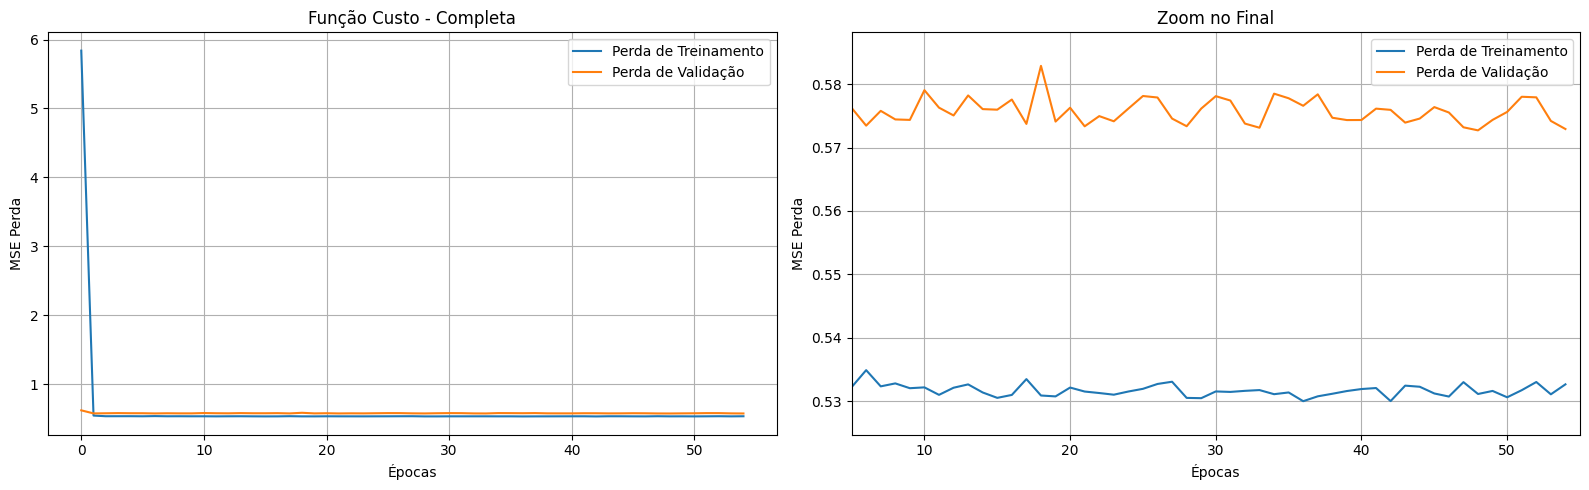

MAE:
  Modelo: 0.58
  Trivial: 0.69
  16.56% Melhor

Acurácia:
  Modelo: 0.54
  Acuracia Trivial: 0.44

Variância:
  Modelo: 0.57
  Variancia trivial: 0.78

Pesos: tensor([ 0.1107, -0.2438, -0.0225,  0.3026, -0.0195,  0.0820, -0.0796, -0.3147,
         0.0903,  0.1159,  0.2718,  0.1584], requires_grad=True)

Víes: Parameter containing:
tensor([5.8224], requires_grad=True)

Peso mais insignificativo é chlorides com valor -0.0195
Peso mais significativo é density com valor -0.3147 
--------------------

Número de Épocas: 80


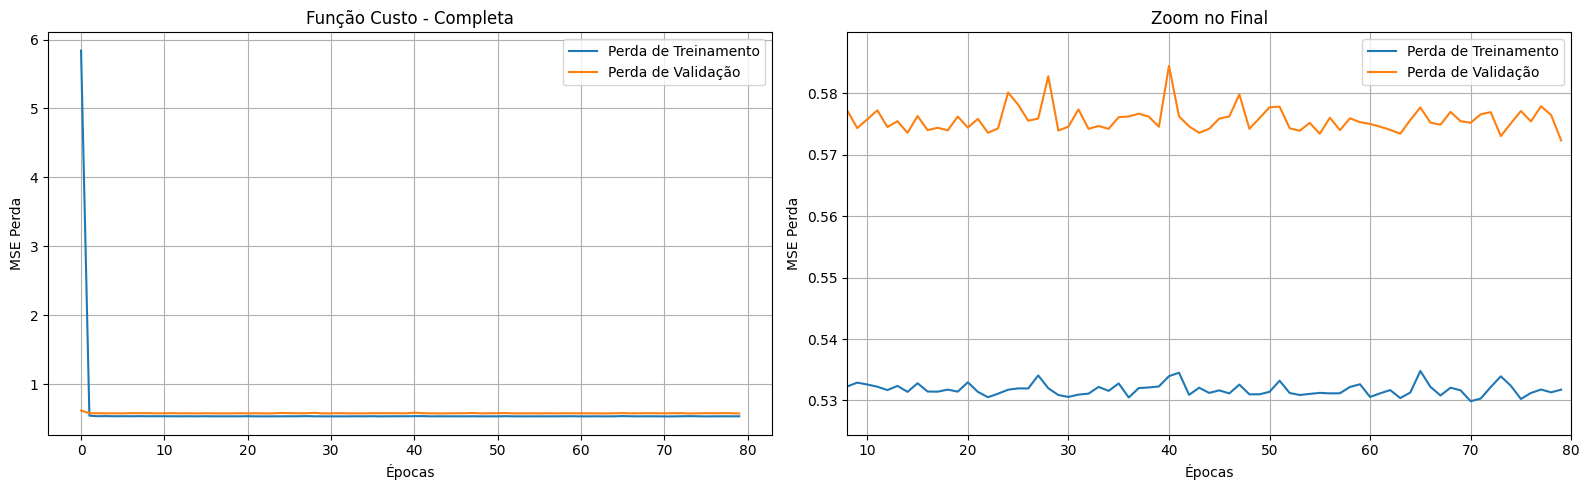

MAE:
  Modelo: 0.58
  Trivial: 0.69
  16.53% Melhor

Acurácia:
  Modelo: 0.54
  Acuracia Trivial: 0.44

Variância:
  Modelo: 0.57
  Variancia trivial: 0.78

Pesos: tensor([ 0.1087, -0.2445, -0.0165,  0.2980, -0.0247,  0.0752, -0.0776, -0.3191,
         0.0839,  0.1135,  0.2677,  0.1520], requires_grad=True)

Víes: Parameter containing:
tensor([5.8267], requires_grad=True)

Peso mais insignificativo é citric acid com valor -0.0165
Peso mais significativo é density com valor -0.3191 
--------------------



In [36]:
for num_epoche in range(5, 105, 25):
    print(f"Número de Épocas: {num_epoche}")
    eval_model_u(df_train=df_u_train, df_val=df_u_val, n_epoches=num_epoche, show_epoche_info=False)
    print(f"{'-'*20}\n")

#### 2. Variação da Taxa de Aprendizagem (Learning Rate)

A taxa de aprendizagem (lr) é um dos hiperparâmetros mais críticos em modelos treinados com gradiente descendente. Ela controla o tamanho do passo dado na direção do gradiente negativo durante a atualização dos pesos. Taxas de aprendizagem muito altas podem fazer com que o otimizador "salte" sobre o mínimo da função de custo, levando à divergência, enquanto taxas muito baixas podem resultar em uma convergência excessivamente lenta.


Learning Rate: 0.10000


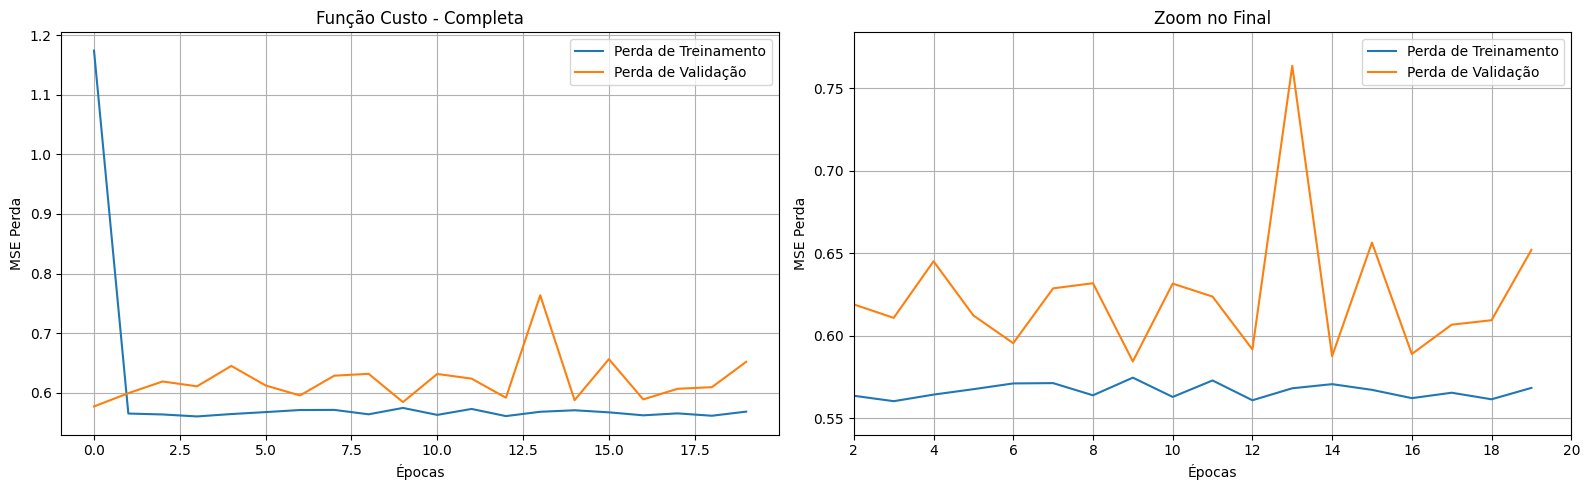

MAE:
  Modelo: 0.62
  Trivial: 0.69
  10.21% Melhor

Acurácia:
  Modelo: 0.51
  Acuracia Trivial: 0.44

Variância:
  Modelo: 0.65
  Variancia trivial: 0.78

Pesos: tensor([ 0.0753, -0.2583, -0.0032,  0.3393, -0.0958,  0.0461, -0.0850, -0.4054,
         0.1246, -0.0857,  0.2577,  0.1476], requires_grad=True)

Víes: Parameter containing:
tensor([5.8502], requires_grad=True)

Peso mais insignificativo é citric acid com valor -0.0032
Peso mais significativo é density com valor -0.4054 
--------------------

Learning Rate: 0.01000


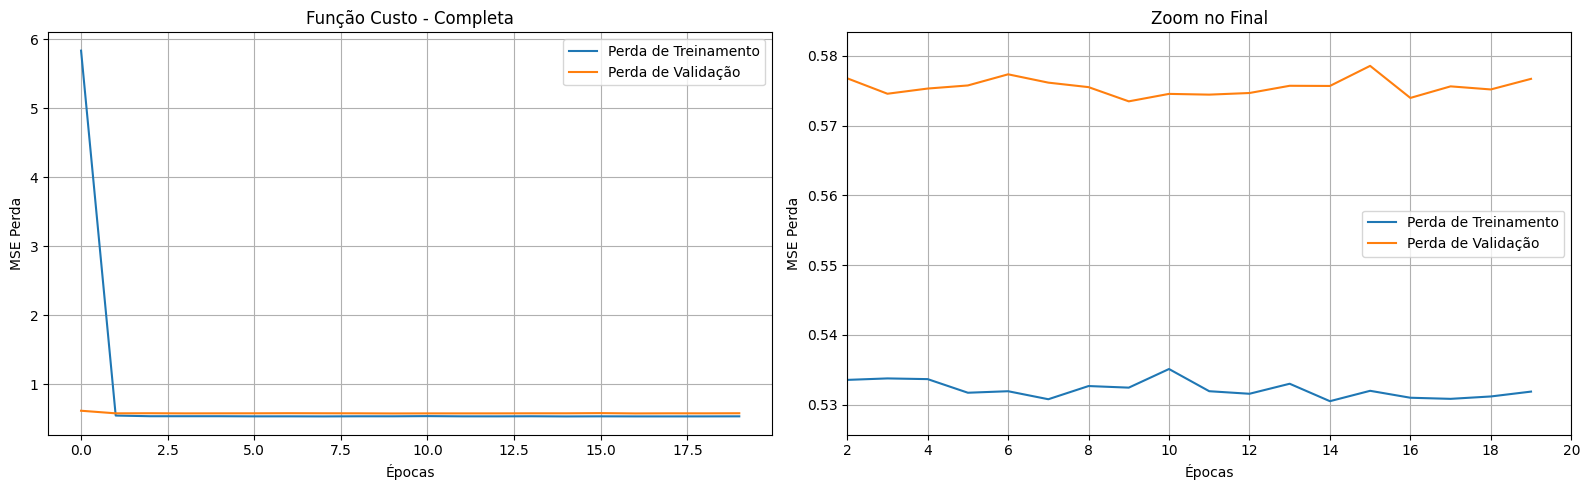

MAE:
  Modelo: 0.58
  Trivial: 0.69
  16.29% Melhor

Acurácia:
  Modelo: 0.52
  Acuracia Trivial: 0.44

Variância:
  Modelo: 0.57
  Variancia trivial: 0.78

Pesos: tensor([ 0.0978, -0.2701, -0.0139,  0.2752, -0.0330,  0.1022, -0.0729, -0.2753,
         0.0622,  0.1046,  0.2991,  0.1312], requires_grad=True)

Víes: Parameter containing:
tensor([5.8301], requires_grad=True)

Peso mais insignificativo é citric acid com valor -0.0139
Peso mais significativo é alcohol com valor 0.2991 
--------------------

Learning Rate: 0.00100


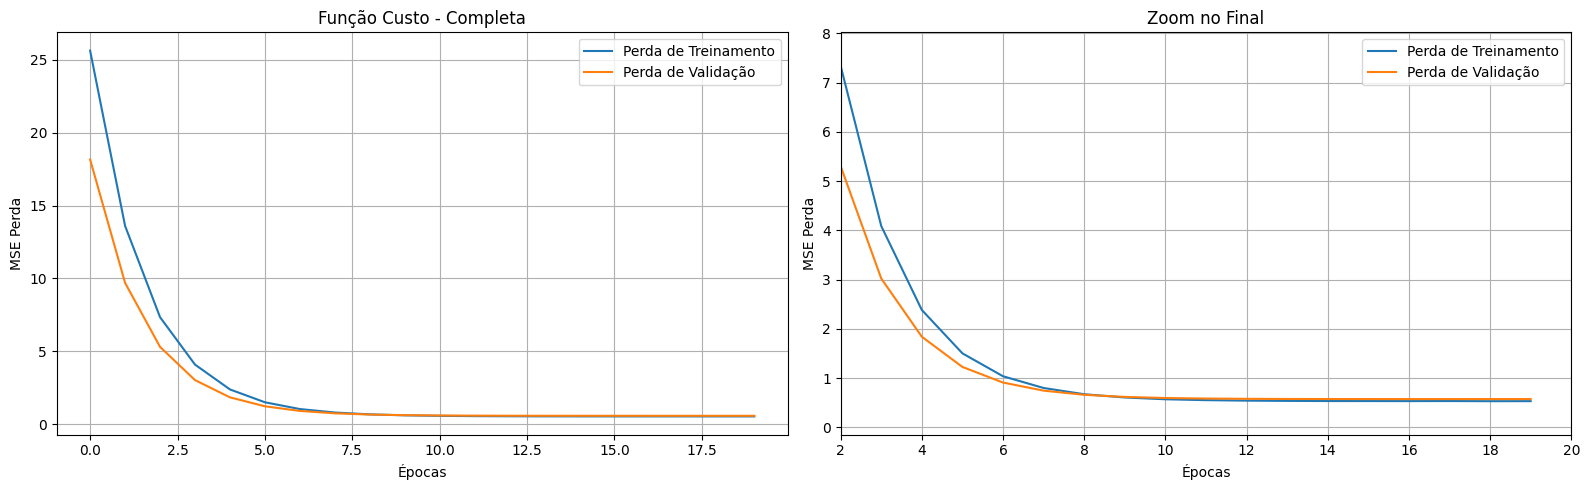

MAE:
  Modelo: 0.58
  Trivial: 0.69
  16.67% Melhor

Acurácia:
  Modelo: 0.53
  Acuracia Trivial: 0.44

Variância:
  Modelo: 0.57
  Variancia trivial: 0.78

Pesos: tensor([ 0.0365, -0.2313, -0.0059,  0.1633, -0.0404,  0.0896, -0.0965, -0.0904,
         0.0354,  0.1018,  0.3539,  0.0610], requires_grad=True)

Víes: Parameter containing:
tensor([5.8144], requires_grad=True)

Peso mais insignificativo é citric acid com valor -0.0059
Peso mais significativo é alcohol com valor 0.3539 
--------------------

Learning Rate: 0.00010


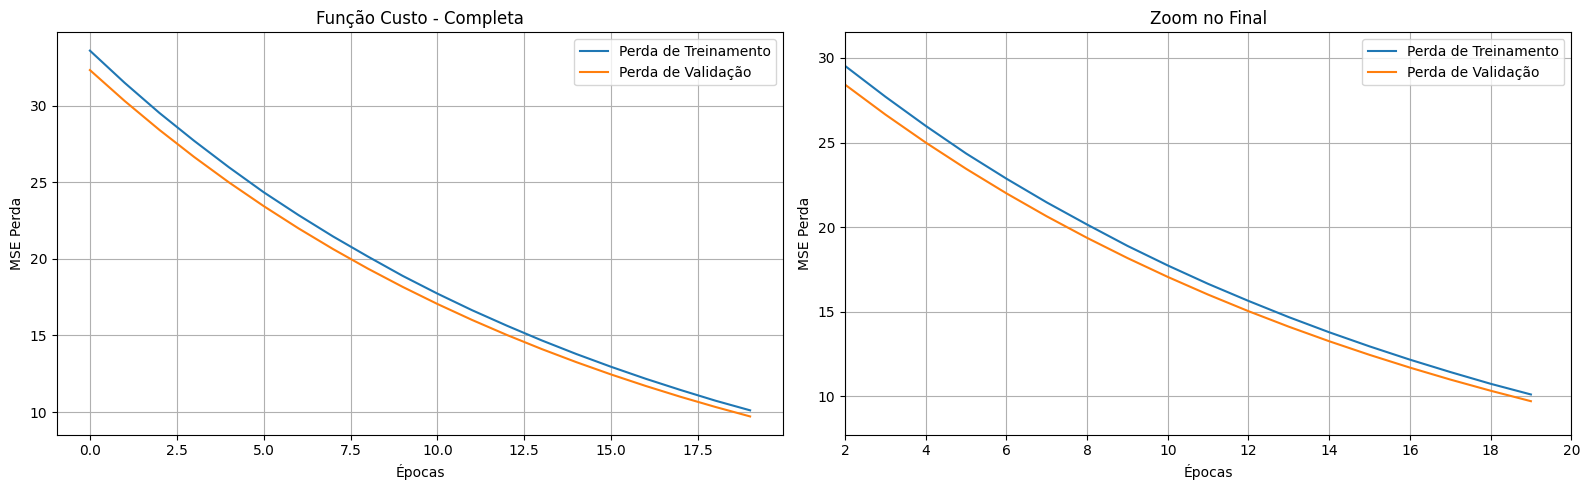

MAE:
  Modelo: 3.02
  Trivial: 0.69
  -334.26% Melhor

Acurácia:
  Modelo: 0.00
  Acuracia Trivial: 0.44

Variância:
  Modelo: 0.62
  Variancia trivial: 0.78

Pesos: tensor([-0.0004, -0.0992,  0.0232,  0.0094, -0.0512,  0.0122, -0.0325, -0.0789,
         0.0049,  0.0376,  0.1500, -0.0212], requires_grad=True)

Víes: Parameter containing:
tensor([2.7890], requires_grad=True)

Peso mais insignificativo é fixed acidity com valor -0.0004
Peso mais significativo é alcohol com valor 0.1500 
--------------------

Learning Rate: 0.00001


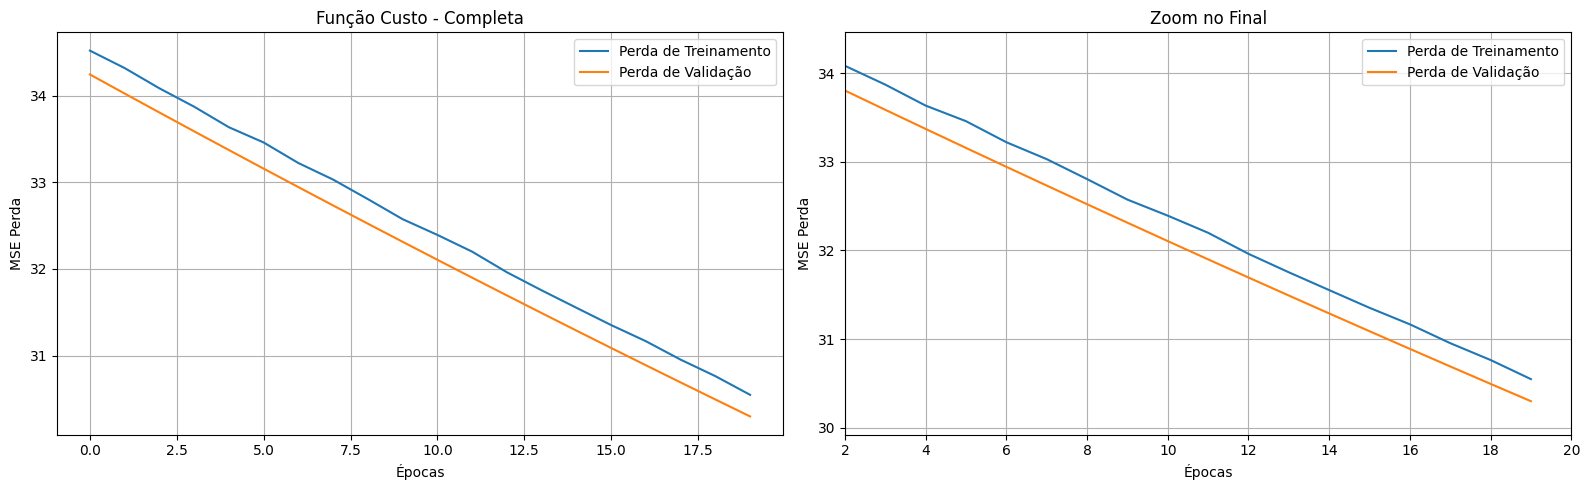

MAE:
  Modelo: 5.44
  Trivial: 0.69
  -682.94% Melhor

Acurácia:
  Modelo: 0.00
  Acuracia Trivial: 0.44

Variância:
  Modelo: 0.74
  Variancia trivial: 0.78

Pesos: tensor([ 0.0098, -0.0155,  0.0049,  0.0080, -0.0130, -0.0106, -0.0195, -0.0249,
        -0.0049,  0.0018,  0.0343, -0.0087], requires_grad=True)

Víes: Parameter containing:
tensor([0.3675], requires_grad=True)

Peso mais insignificativo é sulphates com valor 0.0018
Peso mais significativo é alcohol com valor 0.0343 
--------------------



In [37]:
for mult in range(1, 6):
    lr = 10 ** (-mult)
    print(f"Learning Rate: {lr:.5f}")
    eval_model_u(df_train=df_u_train, df_val=df_u_val, lr=lr, show_epoche_info=False)
    print(f"{'-'*20}\n")

#### 3. Variação do Tamanho do Lote (Batch Size)

O tamanho do lote (batch size) influencia a estimativa do gradiente e o tempo de treinamento. Lotes menores introduzem mais ruído na estimativa do gradiente, o que pode ajudar a escapar de mínimos locais ruins, mas também pode tornar a convergência mais instável. Lotes maiores fornecem uma estimativa de gradiente mais precisa, levando a uma convergência mais suave, mas podem ser computacionalmente mais caros por iteração e podem convergir para mínimos locais mais "sharp" (agudos).

Tamanho da Batche: 32


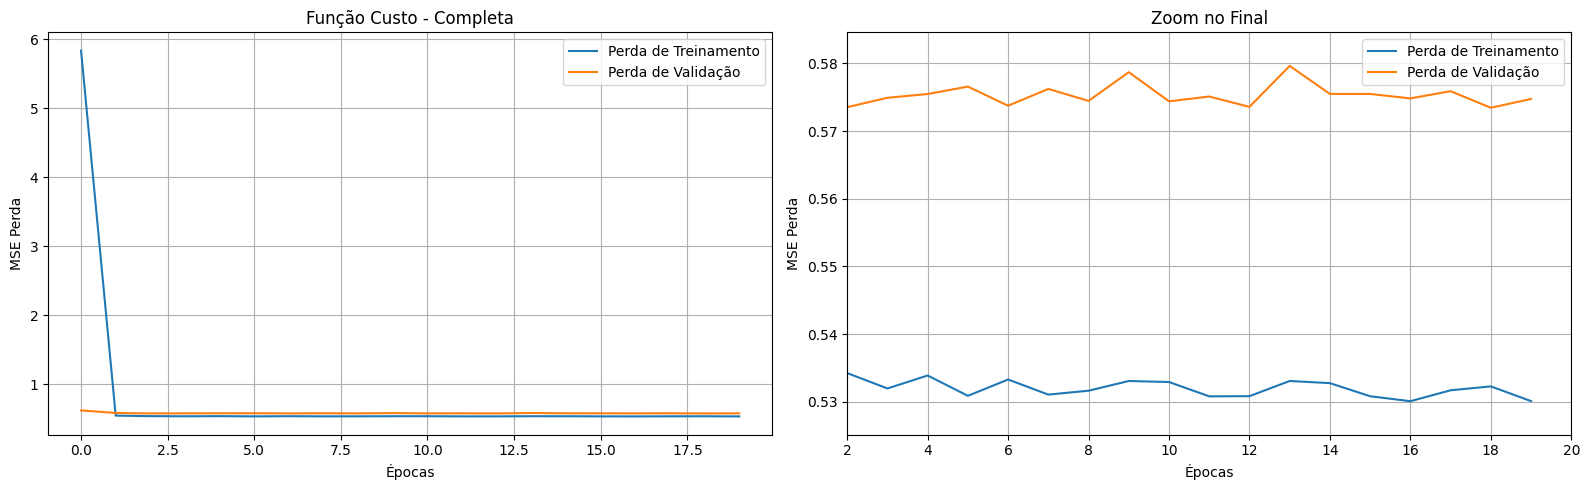

MAE:
  Modelo: 0.58
  Trivial: 0.69
  16.47% Melhor

Acurácia:
  Modelo: 0.54
  Acuracia Trivial: 0.44

Variância:
  Modelo: 0.57
  Variancia trivial: 0.78

Pesos: tensor([ 0.1106, -0.2515, -0.0088,  0.2844, -0.0129,  0.0794, -0.0859, -0.2724,
         0.0596,  0.0949,  0.3048,  0.1416], requires_grad=True)

Víes: Parameter containing:
tensor([5.8202], requires_grad=True)

Peso mais insignificativo é citric acid com valor -0.0088
Peso mais significativo é alcohol com valor 0.3048 
--------------------

Tamanho da Batche: 64


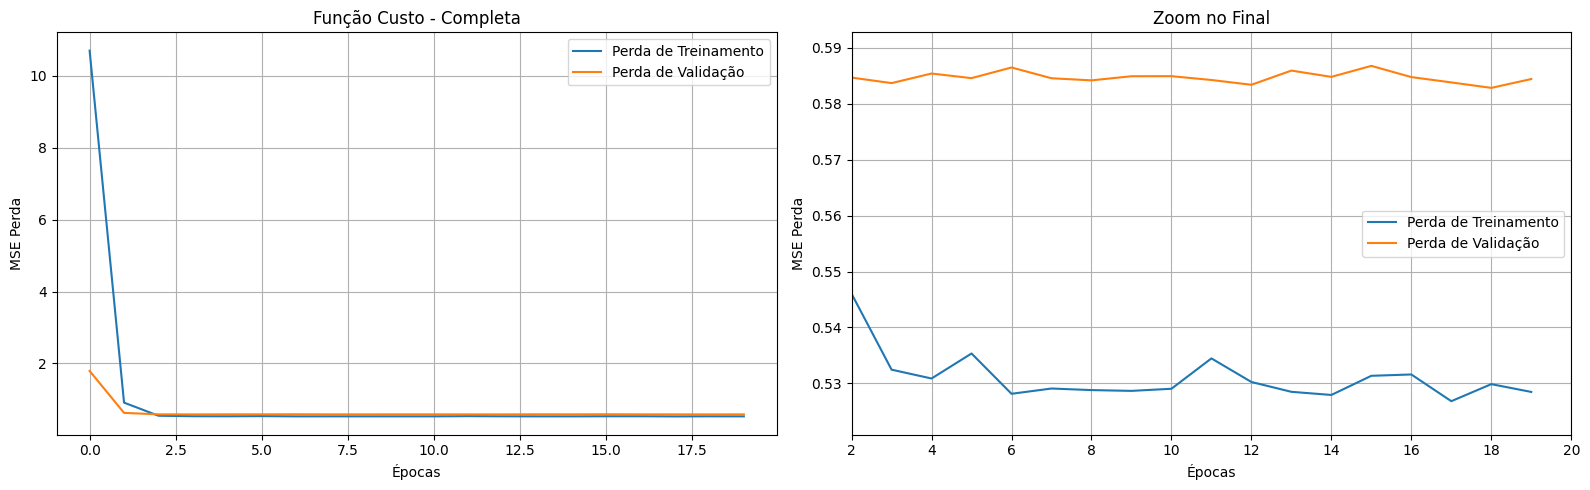

MAE:
  Modelo: 0.58
  Trivial: 0.69
  16.54% Melhor

Acurácia:
  Modelo: 0.52
  Acuracia Trivial: 0.44

Variância:
  Modelo: 0.57
  Variancia trivial: 0.78

Pesos: tensor([ 0.0877, -0.2532, -0.0062,  0.2363, -0.0296,  0.0830, -0.0912, -0.1940,
         0.0465,  0.0999,  0.3170,  0.1197], requires_grad=True)

Víes: Parameter containing:
tensor([5.8147], requires_grad=True)

Peso mais insignificativo é citric acid com valor -0.0062
Peso mais significativo é alcohol com valor 0.3170 
--------------------

Tamanho da Batche: 96


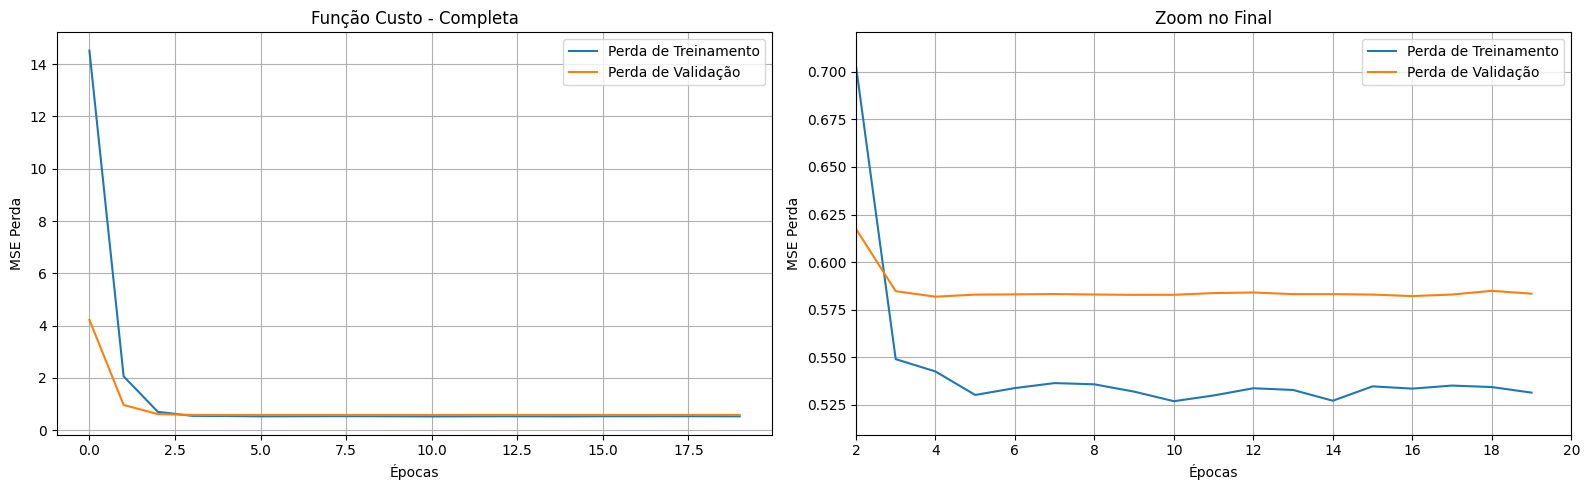

MAE:
  Modelo: 0.58
  Trivial: 0.69
  16.56% Melhor

Acurácia:
  Modelo: 0.54
  Acuracia Trivial: 0.44

Variância:
  Modelo: 0.57
  Variancia trivial: 0.78

Pesos: tensor([ 0.0739, -0.2499, -0.0132,  0.2177, -0.0299,  0.0855, -0.0966, -0.1668,
         0.0490,  0.1008,  0.3385,  0.1116], requires_grad=True)

Víes: Parameter containing:
tensor([5.8299], requires_grad=True)

Peso mais insignificativo é citric acid com valor -0.0132
Peso mais significativo é alcohol com valor 0.3385 
--------------------

Tamanho da Batche: 128


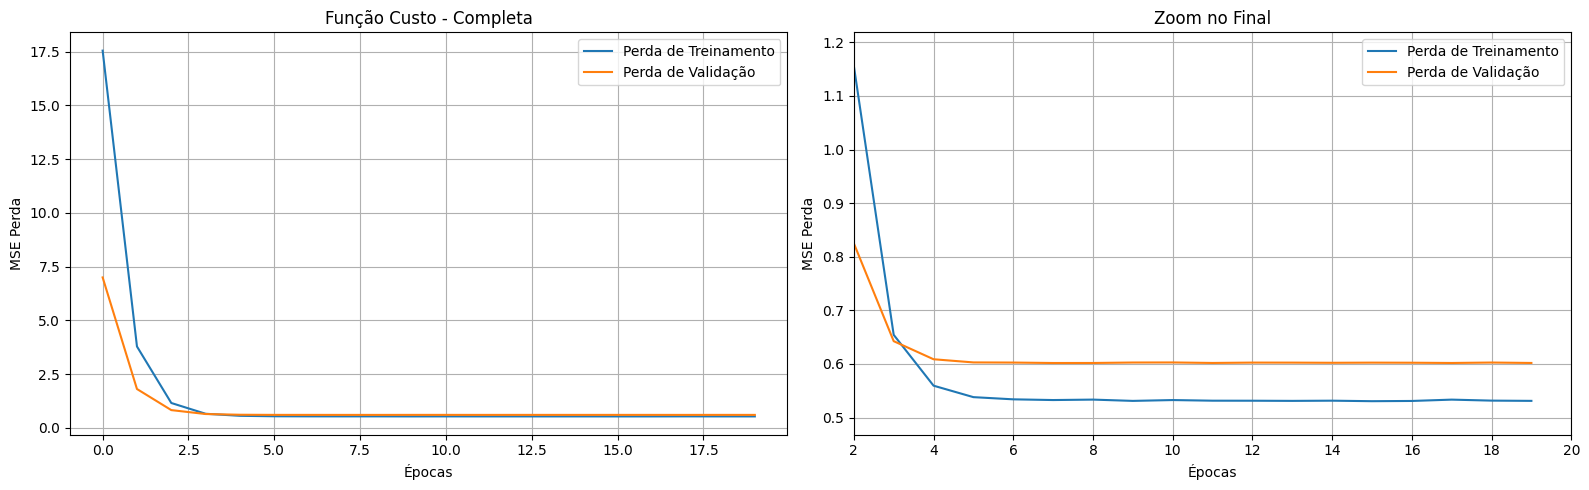

MAE:
  Modelo: 0.58
  Trivial: 0.69
  16.64% Melhor

Acurácia:
  Modelo: 0.53
  Acuracia Trivial: 0.44

Variância:
  Modelo: 0.57
  Variancia trivial: 0.78

Pesos: tensor([ 0.0569, -0.2475, -0.0176,  0.2066, -0.0335,  0.0959, -0.0945, -0.1431,
         0.0510,  0.0990,  0.3420,  0.0984], requires_grad=True)

Víes: Parameter containing:
tensor([5.8198], requires_grad=True)

Peso mais insignificativo é citric acid com valor -0.0176
Peso mais significativo é alcohol com valor 0.3420 
--------------------



In [38]:
for batch_size in range(32, 129, 32):
    print(f"Tamanho da Batche: {batch_size}")
    eval_model_u(df_train=df_u_train, df_val=df_u_val, show_epoche_info=False, batch_size=batch_size)
    print(f"{'-'*20}\n")

#### 4. Eliminação Recursiva de Features (Recursive Feature Elimination - RFE Simplificada)
Para entender a contribuição relativa de cada feature e investigar se um modelo mais simples (com menos features) pode alcançar um desempenho comparável ou até melhor (devido à redução de ruído ou complexidade), realizamos um processo de eliminação recursiva de features.

O procedimento é o seguinte:

1. Treinar o modelo com o conjunto atual de features.
2. Utilizar a função eval_model_u (que internamente chama compare_to_trivial) para identificar a feature com o menor peso em magnitude absoluta. Esta feature é considerada a "menos significativa" no contexto do modelo linear atual.
3. Remover permanentemente essa feature dos conjuntos de treinamento e validação.
4. Repetir os passos 1-3 até que apenas um número mínimo de features reste ou até que não haja mais features a serem removidas (excluindo a variável alvo e, potencialmente, as colunas de tipo, se tratadas de forma especial).

Este método é uma forma simplificada de Recursive Feature Elimination (RFE) e nos permite observar como o desempenho do modelo se altera à medida que features menos influentes (conforme determinado pelos pesos do modelo) são removidas.

In [39]:
df_u_train_ = df_u_train.copy()
df_u_val_ = df_u_val.copy()
range_size = df_s_val.columns.size - 3

min_feature = eval_model_u(df_train=df_u_train_, df_val=df_u_val_, show_epoche_info=False, show_graph=False)
print(f"{'-'*20}\n")
for _ in range(range_size):
    df_u_train_ = df_u_train_.drop(columns=[min_feature])
    df_u_val_ = df_u_val_.drop(columns=[min_feature])
    print(f"Variavel {min_feature} Removida!")
    min_feature = eval_model_u(df_train=df_u_train_, df_val=df_u_val_, show_epoche_info=False, show_graph=False)
    print(f"{'-'*20}\n")

MAE:
  Modelo: 0.58
  Trivial: 0.69
  16.12% Melhor

Acurácia:
  Modelo: 0.52
  Acuracia Trivial: 0.44

Variância:
  Modelo: 0.58
  Variancia trivial: 0.78

Pesos: tensor([ 0.1118, -0.2643, -0.0023,  0.2795, -0.0278,  0.0974, -0.0704, -0.2665,
         0.0451,  0.1092,  0.2915,  0.1273], requires_grad=True)

Víes: Parameter containing:
tensor([5.8326], requires_grad=True)

Peso mais insignificativo é citric acid com valor -0.0023
Peso mais significativo é alcohol com valor 0.2915 
--------------------

Variavel citric acid Removida!
MAE:
  Modelo: 0.58
  Trivial: 0.69
  16.59% Melhor

Acurácia:
  Modelo: 0.53
  Acuracia Trivial: 0.44

Variância:
  Modelo: 0.57
  Variancia trivial: 0.78

Pesos: tensor([ 0.0806, -0.2448,  0.2833, -0.0267,  0.0863, -0.0821, -0.2700,  0.0629,
         0.1142,  0.2904,  0.1396], requires_grad=True)

Víes: Parameter containing:
tensor([5.8152], requires_grad=True)

Peso mais insignificativo é chlorides com valor -0.0267
Peso mais significativo é alcohol com 